## Supply Chain Management
16th August 2023

OVERVIEW

A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two
years back. Their higher management has noticed that there is a mismatch in the demand and
supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in
inventory cost and ultimately loss to the company. Hence, the higher management wants to
optimize the supply quantity in each and every warehouse in the entire country.
Create a model.

GOALS

The objective of this exercise is to build a model, using historical data that will determine an
optimum weight of the product to be shipped each time from the respective warehouse.
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it.

In [413]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [340]:
# Load train and validation datsets [we will train model and test the model with train_df datset and test_df will be used for validation]
train_df = pd.read_csv(r"C:\Users\Admin\Desktop\SCM\supply_train.csv")
validation_df = pd.read_csv(r"C:\Users\Admin\Desktop\SCM\supply_test.csv")

## Step 1 : Read, understand and initial cleaning on datasets.

In [341]:
# checking shape of train and validation dataset - make sure same length of columns, we need to make sure same order also but for initially stage.
print(train_df.shape, validation_df.shape)

(16620, 25) (5529, 25)


In [342]:
# checking the percentage of data going to be used for model training & validation test 
# [Here 80:20 rule not applicable but checking for getting idea about datasets]

train_percentage = (train_df.shape[0] / (train_df.shape[0] + validation_df.shape[0])) * 100
validation_percentage = (validation_df.shape[0] / (train_df.shape[0] + validation_df.shape[0])) * 100

print(f"Train dataset percentage: {train_percentage:.2f}%")
print(f"Validation dataset percentage: {validation_percentage:.2f}%")


Train dataset percentage: 75.04%
Validation dataset percentage: 24.96%


In [343]:
# Checking both dataset have same columns in the same order

def check_same_columns_and_order(train_df, vaidation_df):
    # Check if the number of columns is the same
    if train_df.shape[1] == validation_df.shape[1]:
        # Check if the column names and order are the same
        if list(train_df.columns) == list(validation_df.columns):
            print("The datasets have the same number of columns, and the columns are in the same order.")
        else:
            print("The datasets have the same number of columns but with different column order.")
    else:
        print("The datasets have a different number of columns.")

# Run
check_same_columns_and_order(train_df, validation_df)
    

The datasets have the same number of columns, and the columns are in the same order.


In [344]:
# Percentage of Null values in each features.
train_df.isnull().sum()*100/len(train_df)

Unnamed: 0                       0.000000
Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      4.013237
wh_est_year                     47.292419
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.604091
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0

###### Handle null values by droping the columns directly if not necessary for the model and fill mean or mode values if the column is relevant.

In [345]:
# first feature column 'Unnamed' is a serial number column and it is not relevant so let's drop the column.
#"Unnamed" is not a name but there is no name for the column so index position also added.

train_df = train_df.drop("Unnamed: 0", axis=1)
validation_df = validation_df.drop("Unnamed: 0", axis=1)

# WH_Manager_ID is relevant, so let's drop the column also.

train_df = train_df.drop("WH_Manager_ID", axis=1)
validation_df = validation_df.drop("WH_Manager_ID", axis=1)

# wh_est_year is relevant anf have null values, so let's drop the column also.

train_df = train_df.drop("wh_est_year", axis=1)
validation_df = validation_df.drop("wh_est_year", axis=1)

# workers_num have null values, we are sure that some workers are necessary for any warehouse, so let's fillna by mean of workers.

train_df.fillna(train_df.workers_num.mean(), inplace= True)
validation_df.fillna(validation_df.workers_num.mean(), inplace= True)

# approved_wh_govt_certificate have null values, we assume all warehouse require govt approval to run it, so taking mode of the column for fillna.

train_df.fillna(train_df.approved_wh_govt_certificate.mode()[0], inplace= True)
validation_df.fillna(validation_df.approved_wh_govt_certificate.mode()[0], inplace= True)



In [346]:
# Display basic information about the dataframe
train_df.info()

# Display summary statistics for numerical columns
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   Location_type                 16620 non-null  object 
 2   WH_capacity_size              16620 non-null  object 
 3   zone                          16620 non-null  object 
 4   WH_regional_zone              16620 non-null  object 
 5   num_refill_req_l3m            16620 non-null  int64  
 6   transport_issue_l1y           16620 non-null  int64  
 7   Competitor_in_mkt             16620 non-null  int64  
 8   retail_shop_num               16620 non-null  int64  
 9   wh_owner_type                 16620 non-null  object 
 10  distributor_num               16620 non-null  int64  
 11  flood_impacted                16620 non-null  int64  
 12  flood_proof                   16620 non-null  int64  
 13  e

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.683065,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [347]:
# Check for missing values
train_df.isnull().sum()


Ware_house_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

## Step 2 : EXPLORATORY DATA ANALYSIS

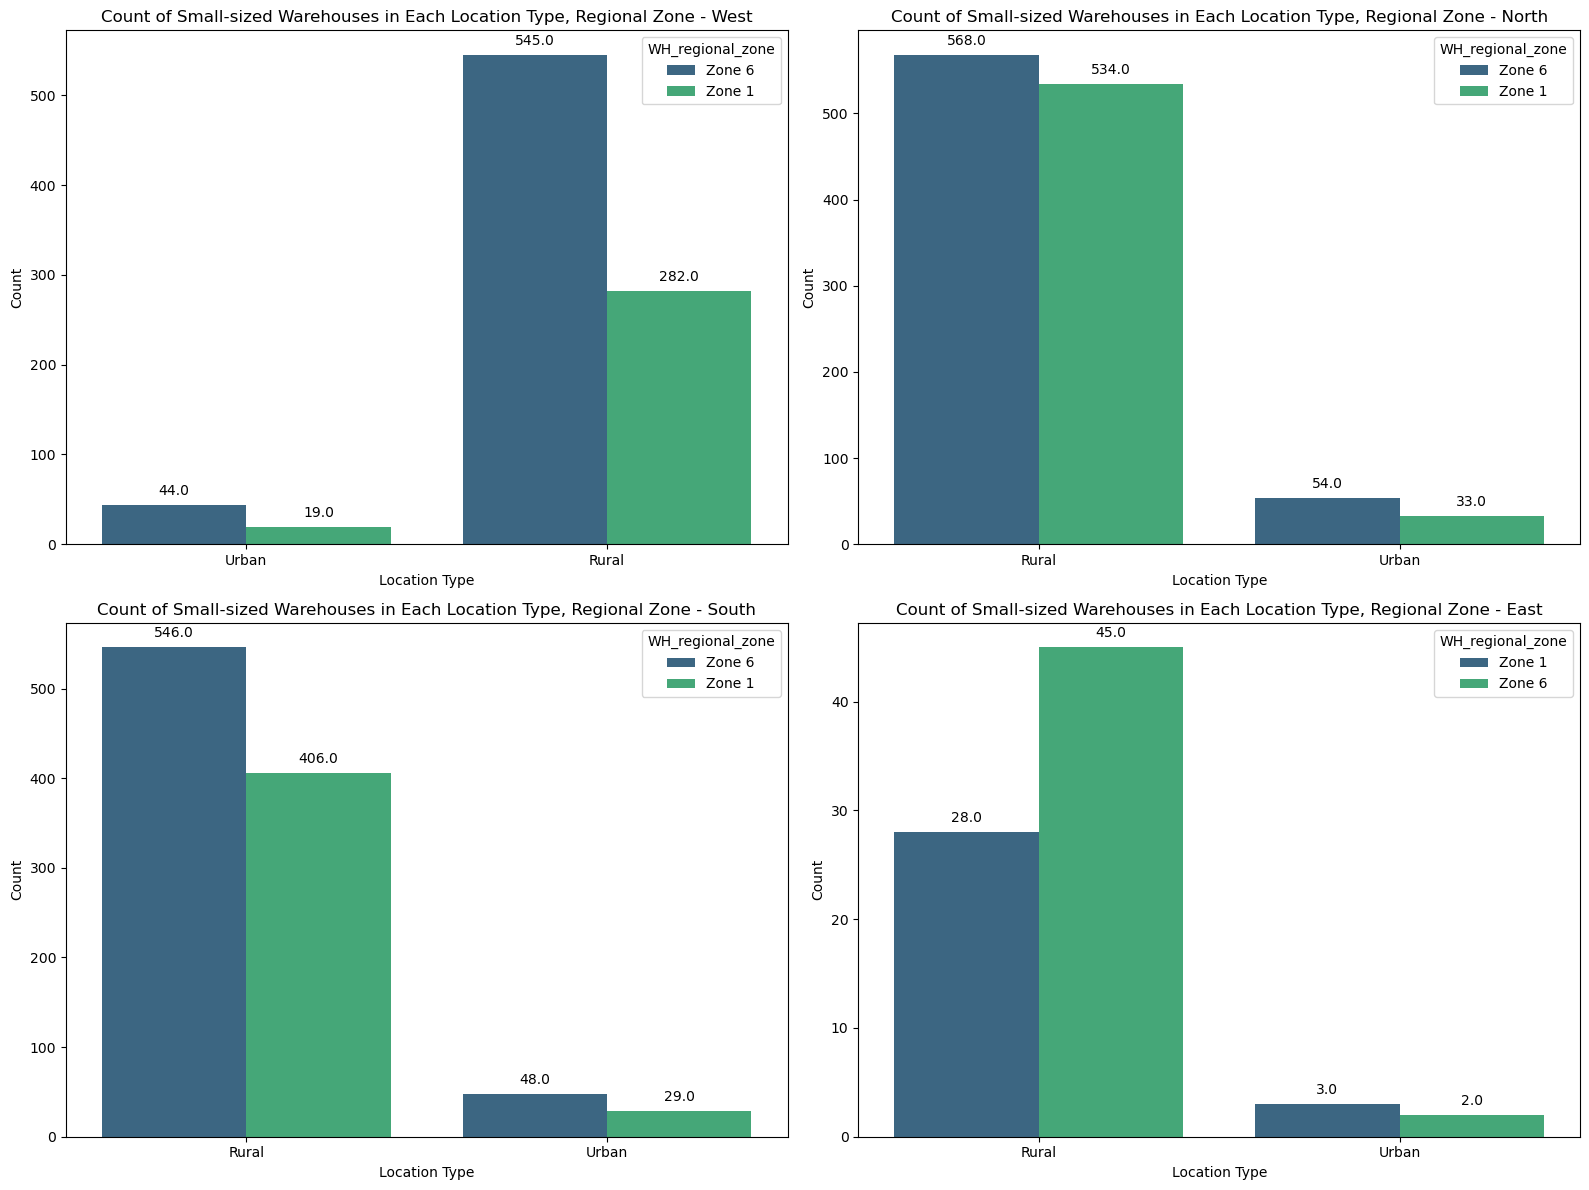

In [348]:
# Visulaise zone wise region wise location wise small capacity warehouse count.

# Set up the matplotlib figure with 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# List of unique zones
unique_zones = train_df['zone'].unique()

# Iterate through each zone and create a bar chart for 'Small'
for i, zone in enumerate(unique_zones):
    row = i // 2
    col = i % 2
    
    # Filter data for the specific zone and WH_capacity_size 'Small'
    zone_data_small = train_df[(train_df['zone'] == zone) & (train_df['WH_capacity_size'] == 'Small')]
    
    # Create a nested bar plot using seaborn for 'Small'
    ax = sns.countplot(x='Location_type', hue='WH_regional_zone', data=zone_data_small, palette='viridis', ax=axes[row, col])

    # Add labels and title for each subplot
    ax.set_xlabel('Location Type')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of Small-sized Warehouses in Each Location Type, Regional Zone - {zone}')

    # Display the count values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

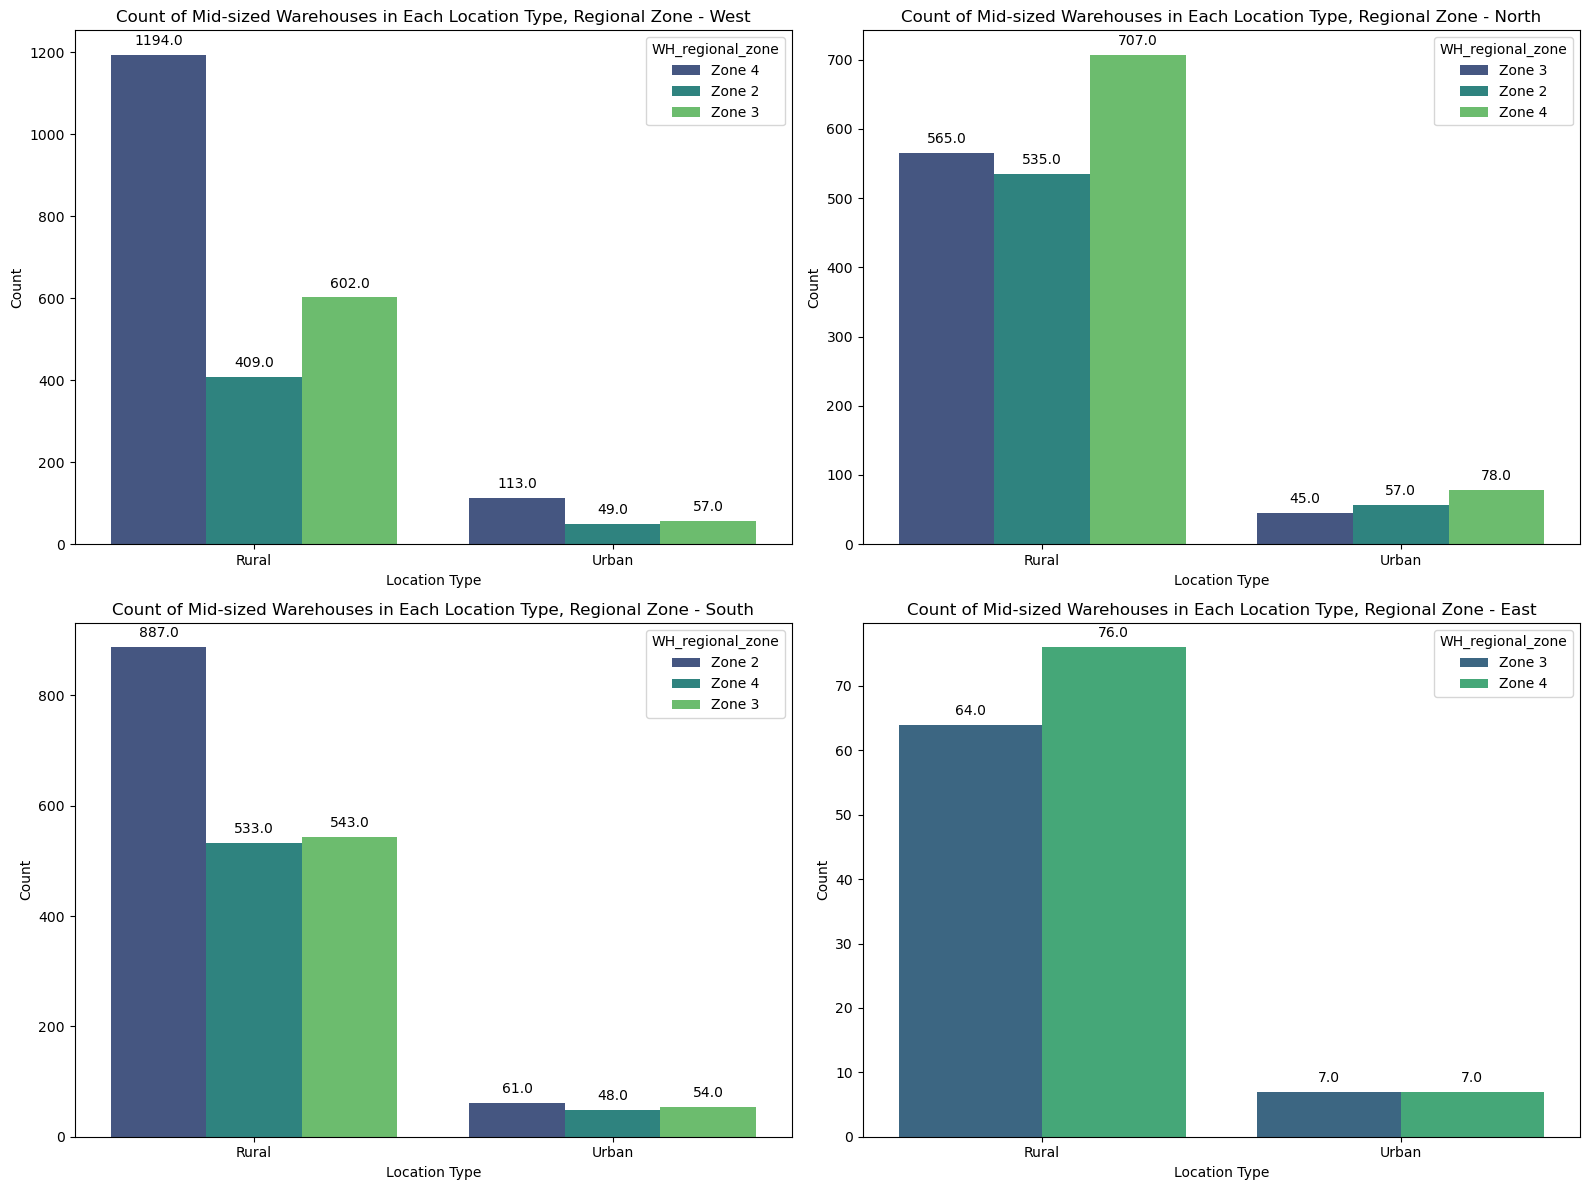

In [349]:
# Visulaise zone wise region wise location wise medium capacity warehouse count.

# Set up the matplotlib figure with 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# List of unique zones
unique_zones = train_df['zone'].unique()

# Iterate through each zone and create a bar chart
for i, zone in enumerate(unique_zones):
    row = i // 2
    col = i % 2
    
    # Filter data for the specific zone and WH_capacity_size 'Mid'
    zone_data_mid = train_df[(train_df['zone'] == zone) & (train_df['WH_capacity_size'] == 'Mid')]
    
    # Create a nested bar plot using seaborn
    ax = sns.countplot(x='Location_type', hue='WH_regional_zone', data=zone_data_mid, palette='viridis', ax=axes[row, col])

    # Add labels and title for each subplot
    ax.set_xlabel('Location Type')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of Mid-sized Warehouses in Each Location Type, Regional Zone - {zone}')

    # Display the count values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


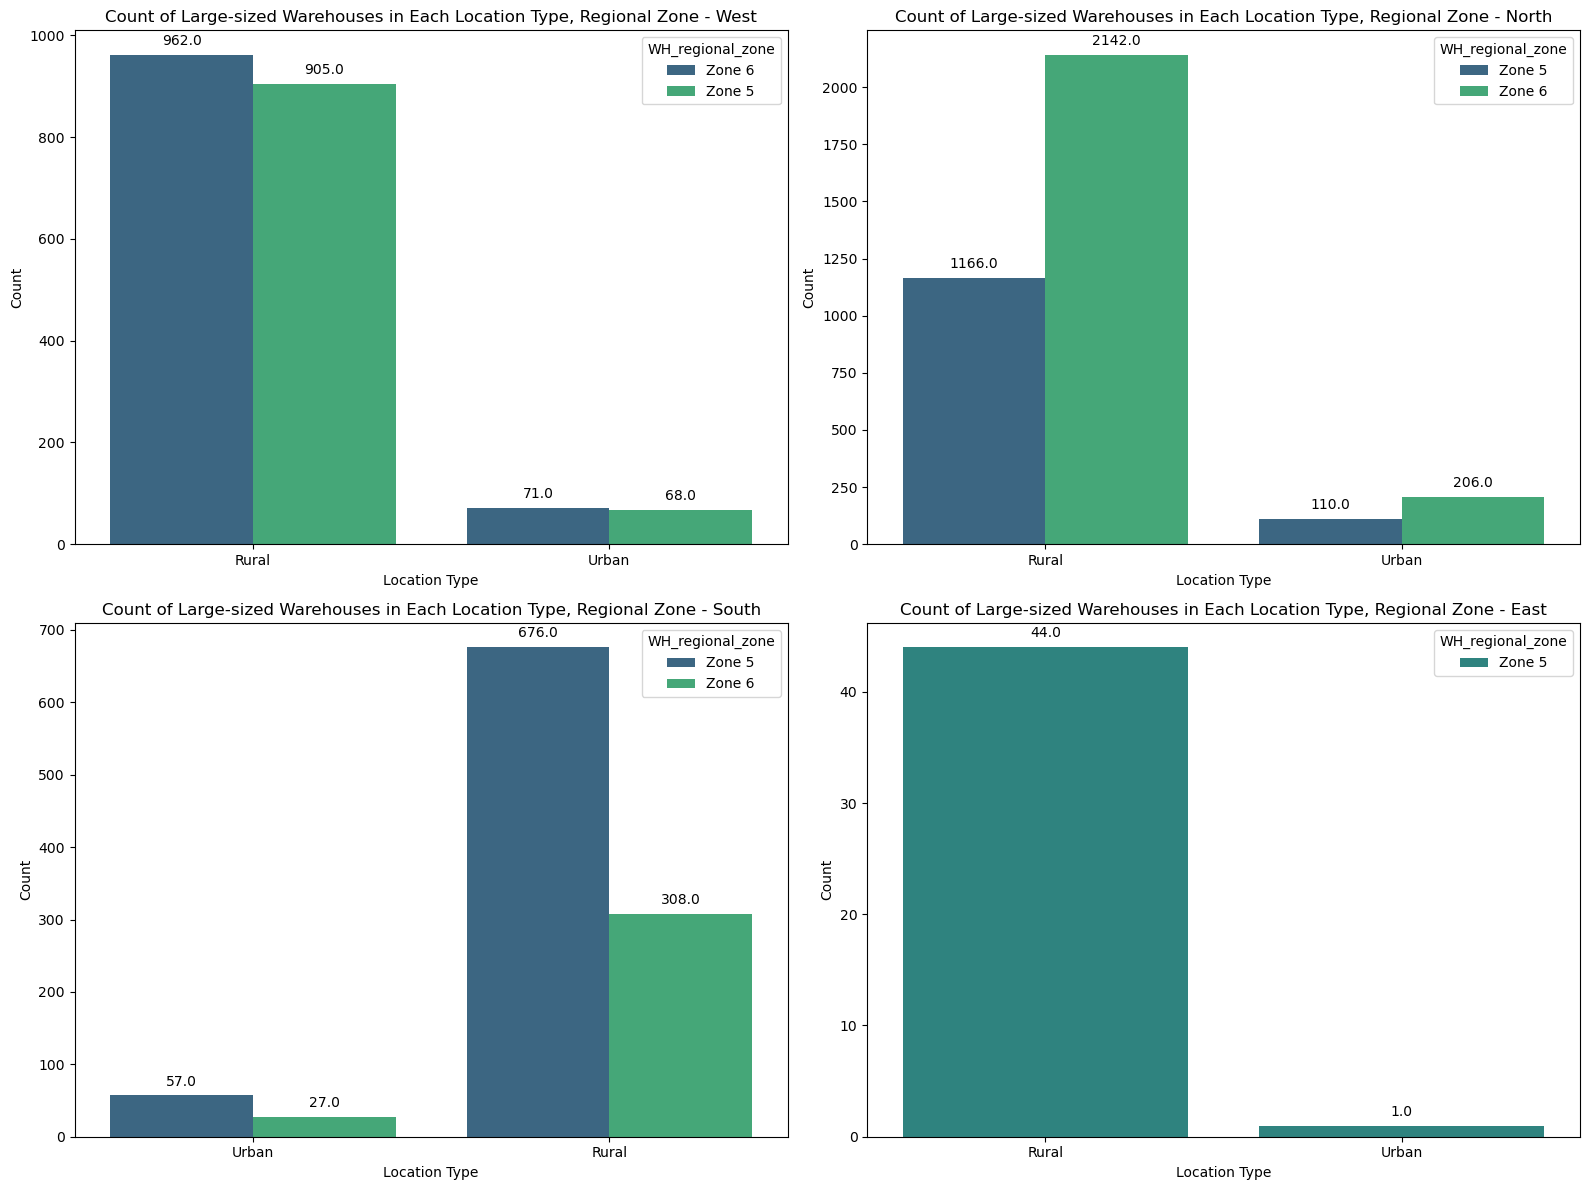

In [350]:
# Visulaise zone wise region wise location wise large capacity warehouse count.

# Set up the matplotlib figure with 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# List of unique zones
unique_zones = train_df['zone'].unique()

# Iterate through each zone and create a bar chart for 'Large'
for i, zone in enumerate(unique_zones):
    row = i // 2
    col = i % 2
    
    # Filter data for the specific zone and WH_capacity_size 'Large'
    zone_data_large = train_df[(train_df['zone'] == zone) & (train_df['WH_capacity_size'] == 'Large')]
    
    # Create a nested bar plot using seaborn for 'Large'
    ax = sns.countplot(x='Location_type', hue='WH_regional_zone', data=zone_data_large, palette='viridis', ax=axes[row, col])

    # Add labels and title for each subplot
    ax.set_xlabel('Location Type')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of Large-sized Warehouses in Each Location Type, Regional Zone - {zone}')

    # Display the count values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#### Summary:
* Small warehouses are available in zone 1 & 6.
* Around 92% of small warehouses are located in rural area compared to urban area. 
* Medium warehouses are available in zone 2,3 & 4.
* Around 91% of medium warehouses are located in rural area compared to urban area. 
* Large warehouses are available in zone 5 & 6.
* Around 91% of large warehouses are located in rural area compared to urban area.
* It is quite strange that only 9% warehouses in most populous plus staple food loving urban area and 91% warehouses are in rural area. 
* Additional information required to check whether urban area supply is directly by factory or not, 
* if so, we need to check the factory storage capacity to asses whether it is sufficient to meet urban area demand plus rural area demand. 

In [351]:
# Create a pivot table to get the count of warehouses,adding the count by rest the index
warehouse_counts = train_df.pivot_table(index=['zone', 'WH_regional_zone', 'WH_capacity_size', 'Location_type'], 
                                        aggfunc='count', values='Ware_house_ID').reset_index()
# Display the table
print(warehouse_counts)

     zone WH_regional_zone WH_capacity_size Location_type  Ware_house_ID
0    East           Zone 1            Small         Rural             28
1    East           Zone 1            Small         Urban              3
2    East           Zone 3              Mid         Rural             64
3    East           Zone 3              Mid         Urban              7
4    East           Zone 4              Mid         Rural             76
5    East           Zone 4              Mid         Urban              7
6    East           Zone 5            Large         Rural             44
7    East           Zone 5            Large         Urban              1
8    East           Zone 6            Small         Rural             45
9    East           Zone 6            Small         Urban              2
10  North           Zone 1            Small         Rural            534
11  North           Zone 1            Small         Urban             33
12  North           Zone 2              Mid        

In [352]:
# Table of region wise location wise capacity wise count of warehouses.

# Create a pivot table to get the count of warehouses
region_location_counts = train_df.pivot_table(index=['WH_regional_zone', 'Location_type'], 
                                              aggfunc='size').reset_index(name='Warehouse_Count')

# Display the table
print(region_location_counts)


   WH_regional_zone Location_type  Warehouse_Count
0            Zone 1         Rural             1250
1            Zone 1         Urban               84
2            Zone 2         Rural             1831
3            Zone 2         Urban              167
4            Zone 3         Rural             1774
5            Zone 3         Urban              163
6            Zone 4         Rural             2510
7            Zone 4         Urban              246
8            Zone 5         Rural             2791
9            Zone 5         Urban              236
10           Zone 6         Rural             5116
11           Zone 6         Urban              452


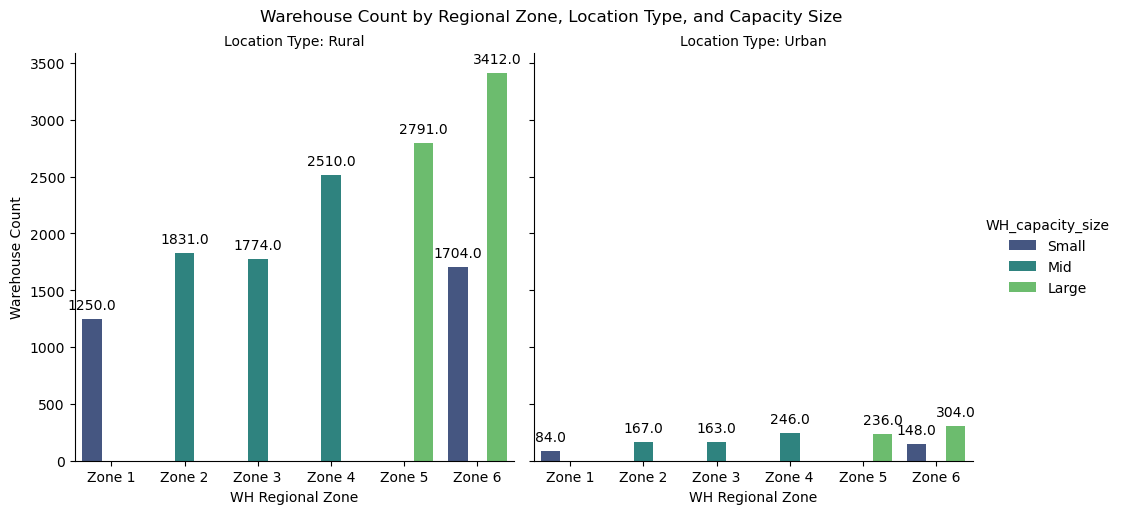

In [353]:
# visualise region wise warehouse count.


# Count the number of warehouses by regional zone, location type, and capacity size
warehouse_count_df = train_df.groupby(['WH_regional_zone', 'Location_type', 'WH_capacity_size']).size().reset_index(name='Warehouse_Count')

# Set up the seaborn figure
g = sns.catplot(x='WH_regional_zone', y='Warehouse_Count', hue='WH_capacity_size', col='Location_type', kind='bar', 
                data=warehouse_count_df, palette='viridis')

# Add labels and title
g.set_axis_labels('WH Regional Zone', 'Warehouse Count')
g.set_titles('Location Type: {col_name}')
g.fig.suptitle('Warehouse Count by Regional Zone, Location Type, and Capacity Size', y=1.02)

# Annotate the count of warehouses on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()



#### summary:

* zone 1 have only small WH
* zone 2,3,4 have medium WH
* zone 5 have large WH
* zone 6 have small and large WH


In [354]:
# Table of zone wise wahrehouse count.

zone_location_capacity_counts = train_df.pivot_table(index=['zone', 'Location_type', 'WH_capacity_size'], 
                                                       aggfunc='size').reset_index(name='Warehouse_Count')

# Display the table
print(zone_location_capacity_counts)


     zone Location_type WH_capacity_size  Warehouse_Count
0    East         Rural            Large               44
1    East         Rural              Mid              140
2    East         Rural            Small               73
3    East         Urban            Large                1
4    East         Urban              Mid               14
5    East         Urban            Small                5
6   North         Rural            Large             3308
7   North         Rural              Mid             1807
8   North         Rural            Small             1102
9   North         Urban            Large              316
10  North         Urban              Mid              180
11  North         Urban            Small               87
12  South         Rural            Large              984
13  South         Rural              Mid             1963
14  South         Rural            Small              952
15  South         Urban            Large               84
16  South     

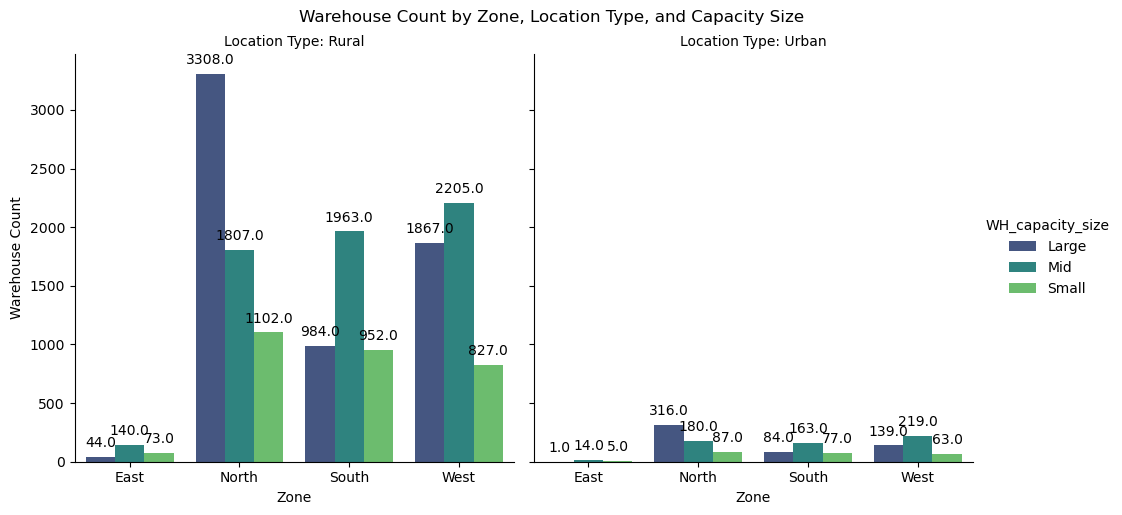

In [355]:
# visualise zone wise warehouse count

# Set up the seaborn figure
g = sns.catplot(x='zone', y='Warehouse_Count', hue='WH_capacity_size', col='Location_type', kind='bar', 
                data=zone_location_capacity_counts, palette='viridis')

# Add labels and title
g.set_axis_labels('Zone', 'Warehouse Count')
g.set_titles('Location Type: {col_name}')
g.fig.suptitle('Warehouse Count by Zone, Location Type, and Capacity Size', y=1.02)

# Annotate the count of warehouses on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


#### Summary:

* Most of the warehouses are located in rural area.
* Rural east zone have lesser number of warehouses compared to other rural zones.
* Rural north, south, and west zones have majority mix of large, medium and small warehouses.
* Urban side warehouses are quite small number compared to rural area.
* Urban north, south, and west zones have majority mix of large, medium and small warehouses.
* Urban east zone have lesser number of warehouses compared to other urban zones.
* In both urban and rural area east zone warehouses are quite few compared to other zone - need to assess demand from east and focus this market for more business potential.

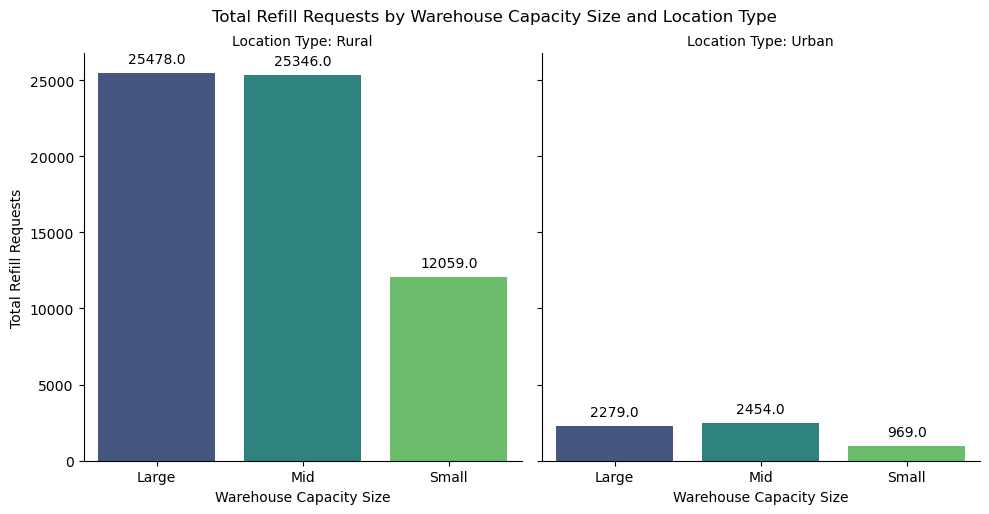

In [356]:
# Visualize location wise capacity wise refill requests.
# Let's create a new DataFrame for the counts
capacity_location_refill_counts = train_df.groupby(['WH_capacity_size', 'Location_type'])['num_refill_req_l3m'].sum().reset_index()
capacity_location_refill_counts.rename(columns={'num_refill_req_l3m': 'Total_Refill_Requests'}, inplace=True)

# Set up the Seaborn figure
g = sns.catplot(
    x='WH_capacity_size',
    y='Total_Refill_Requests',
    col='Location_type',
    kind='bar',
    data=capacity_location_refill_counts,
    palette='viridis'
)

# Add labels and title
g.set_axis_labels('Warehouse Capacity Size', 'Total Refill Requests')
g.set_titles('Location Type: {col_name}')
g.fig.suptitle('Total Refill Requests by Warehouse Capacity Size and Location Type', y=1.02)

# Annotate the count of refill requests on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()



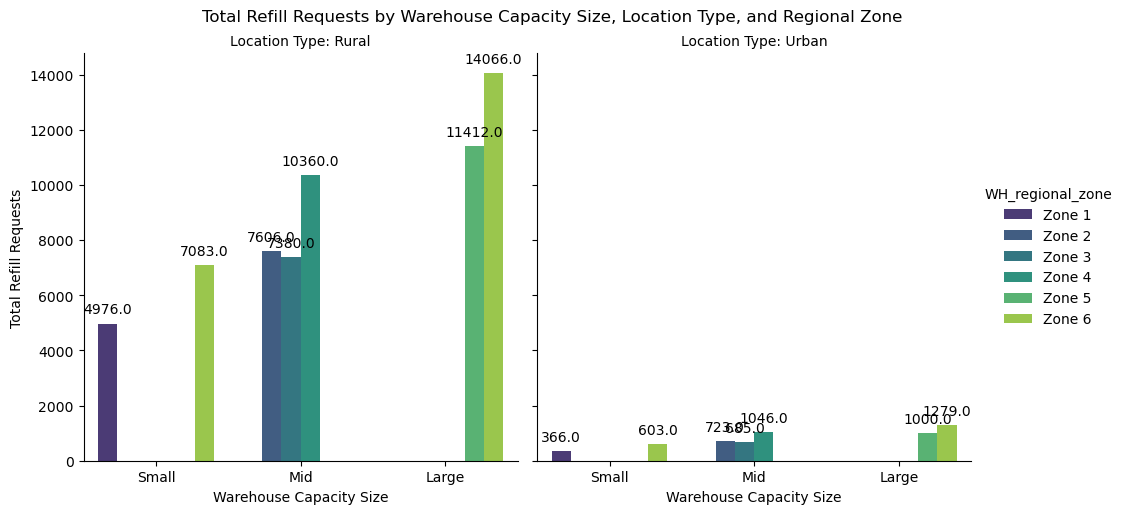

In [357]:
# check visuals of regional zone wise also - location wise capacity wise refill requests.
# Let's create a new DataFrame for the counts
regional_capacity_location_refill_counts = train_df.groupby(['WH_regional_zone', 'WH_capacity_size', 'Location_type'])['num_refill_req_l3m'].sum().reset_index()
regional_capacity_location_refill_counts.rename(columns={'num_refill_req_l3m': 'Total_Refill_Requests'}, inplace=True)

# Set up the Seaborn figure
g = sns.catplot(
    x='WH_capacity_size',
    y='Total_Refill_Requests',
    col='Location_type',
    hue='WH_regional_zone',
    kind='bar',
    data=regional_capacity_location_refill_counts,
    palette='viridis'
)

# Add labels and title
g.set_axis_labels('Warehouse Capacity Size', 'Total Refill Requests')
g.set_titles('Location Type: {col_name}')
g.fig.suptitle('Total Refill Requests by Warehouse Capacity Size, Location Type, and Regional Zone', y=1.02)

# Annotate the count of refill requests on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* In rural area refill reqests of large and medium warehouses are in a similar range.
* Small warehouse request is around half of the demands of medium and large warehouse only. 
* The trend is similar in urban area also with lesser number compared to rural area.
* Zone 6 have highest refill demand from small and large capacity warehouses. 
* From medium capacity warehouse zone 4 having highest demand.

NaN count in 'transport_issue_l1y': 0


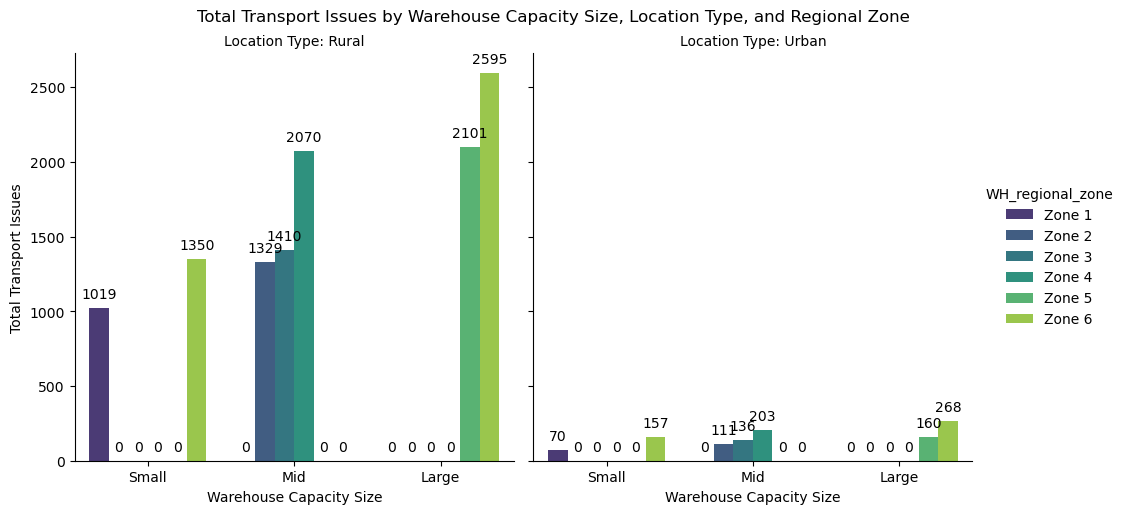

In [358]:
# Visualise regione wise issued transportation.
train_df['transport_issue_l1y'] = train_df['transport_issue_l1y'].fillna(0).astype(int)

# Verify if there are still NaN values in the 'transport_issue_l1y' column
print("NaN count in 'transport_issue_l1y':", train_df['transport_issue_l1y'].isna().sum())

# Create DataFrame for counts
transport_counts = train_df.groupby(['WH_regional_zone', 'WH_capacity_size', 'Location_type'])['transport_issue_l1y'].sum().reset_index()
transport_counts.rename(columns={'transport_issue_l1y': 'Total_Transport_Issues'}, inplace=True)

# Set up the Seaborn figure
g = sns.catplot(
    x='WH_capacity_size',
    y='Total_Transport_Issues',
    col='Location_type',
    hue='WH_regional_zone',
    kind='bar',
    data=transport_counts,
    palette='viridis'
)

# Add labels and title
g.set_axis_labels('Warehouse Capacity Size', 'Total Transport Issues')
g.set_titles('Location Type: {col_name}')
g.fig.suptitle('Total Transport Issues by Warehouse Capacity Size, Location Type, and Regional Zone', y=1.02)

# Annotate the count of transport issues on top of each bar
for ax in g.axes.flat:
    for p in ax.patches:
        count = p.get_height()
        if not pd.isna(count):  # Check if the value is not NaN
            ax.annotate(f'{int(count)}',
                        (p.get_x() + p.get_width() / 2., count),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        else:
            ax.annotate('0',
                        (p.get_x() + p.get_width() / 2., 0),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


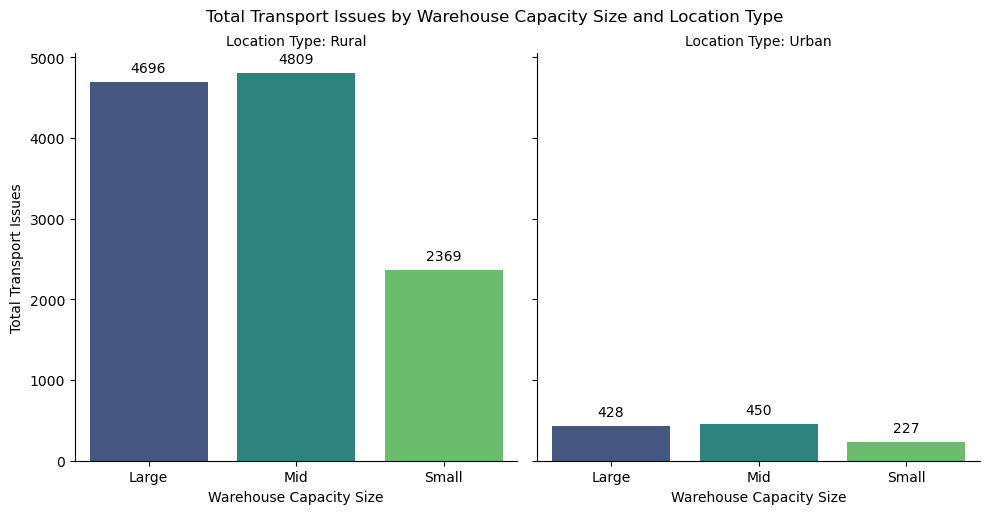

In [359]:
# Visualise issued transportation warehouse capacity wise.
# Create DataFrame for transport issue counts
capacity_location_transport_counts = train_df.groupby(['WH_capacity_size', 'Location_type'])['transport_issue_l1y'].sum().reset_index()
capacity_location_transport_counts.rename(columns={'transport_issue_l1y': 'Total_Transport_Issues'}, inplace=True)

# Set up the Seaborn figure
g_transport = sns.catplot(
    x='WH_capacity_size',
    y='Total_Transport_Issues',
    col='Location_type',
    kind='bar',
    data=capacity_location_transport_counts,
    palette='viridis'
)

# Add labels and title
g_transport.set_axis_labels('Warehouse Capacity Size', 'Total Transport Issues')
g_transport.set_titles('Location Type: {col_name}')
g_transport.fig.suptitle('Total Transport Issues by Warehouse Capacity Size and Location Type', y=1.02)

# Annotate the count of transport issues on top of each bar
for ax in g_transport.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


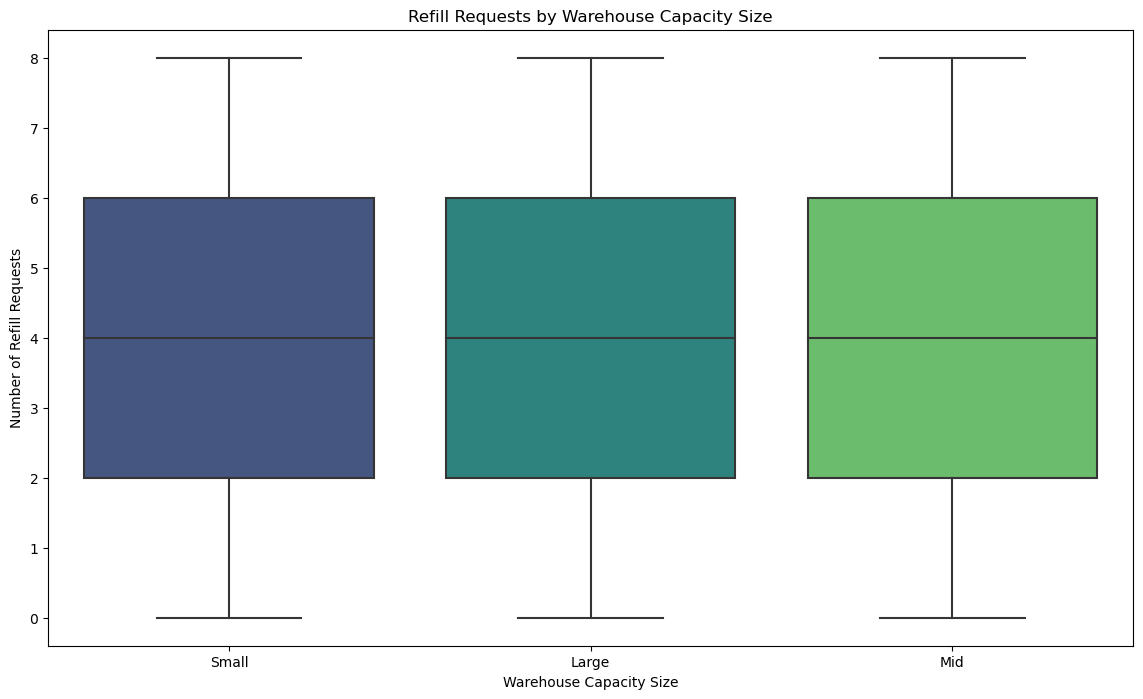

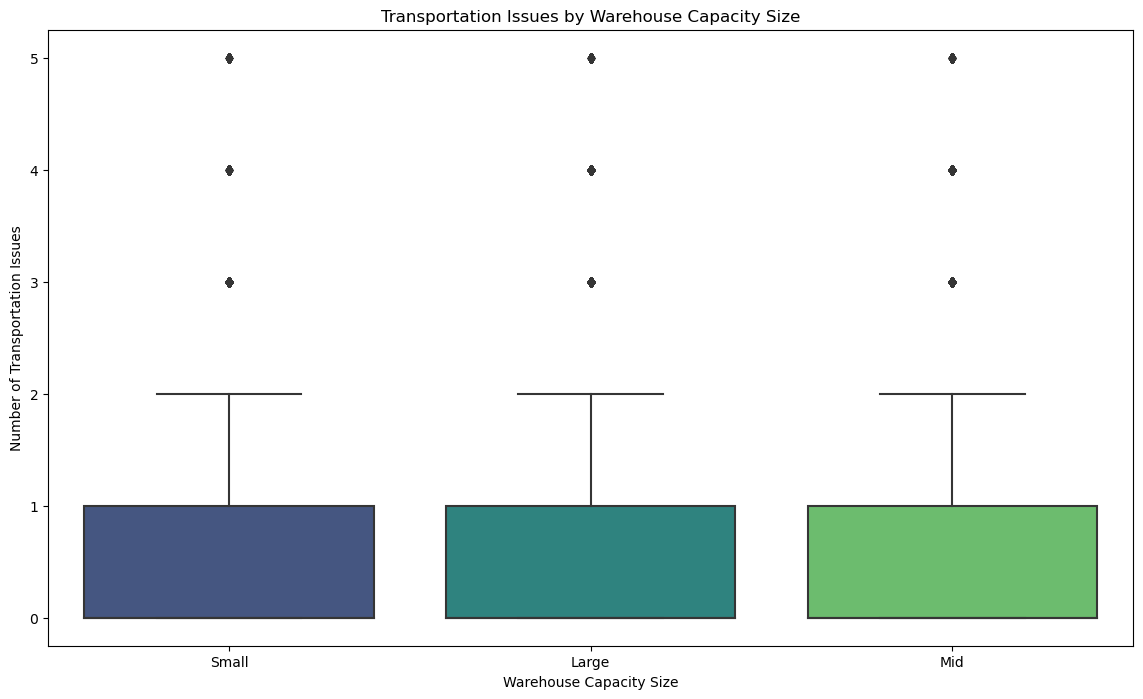

In [360]:
# Boxplot for graphically demonstrating the spread and skewness of data through it's quartiles. 
# Select relevant columns for analysis
selected_columns = ['Ware_house_ID', 'WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y']

# Create a DataFrame with selected columns
analysis_df = train_df[selected_columns]

# Filter out NaN values for better analysis
analysis_df = analysis_df.dropna(subset=['num_refill_req_l3m', 'transport_issue_l1y'])

# Set up the Seaborn figure
plt.figure(figsize=(14, 8))

# Create a box plot for refill requests by warehouse capacity size
sns.boxplot(x='WH_capacity_size', y='num_refill_req_l3m', data=analysis_df, palette='viridis')
plt.title('Refill Requests by Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Number of Refill Requests')

# Show the box plot
plt.show()

# Set up the Seaborn figure
plt.figure(figsize=(14, 8))

# Create a box plot for transportation issues by warehouse capacity size
sns.boxplot(x='WH_capacity_size', y='transport_issue_l1y', data=analysis_df, palette='viridis')
plt.title('Transportation Issues by Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Number of Transportation Issues')

# Show the box plot
plt.show()


In [361]:
# Table showing % of transportation issued for one year and 3 months requests.

# Create a pivot table
table_data = train_df.pivot_table(index=['Location_type', 'WH_capacity_size'],
                                  values=['num_refill_req_l3m', 'transport_issue_l1y'],
                                  aggfunc={'num_refill_req_l3m': 'sum', 'transport_issue_l1y': 'sum'}).reset_index()

# Calculate the percentage of transportation issues
table_data['Transport_Issue_Percentage'] = (table_data['transport_issue_l1y'] / table_data['num_refill_req_l3m']) * 100

# Display the table
print(table_data)



  Location_type WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0         Rural            Large               25478                 4696   
1         Rural              Mid               25346                 4809   
2         Rural            Small               12059                 2369   
3         Urban            Large                2279                  428   
4         Urban              Mid                2454                  450   
5         Urban            Small                 969                  227   

   Transport_Issue_Percentage  
0                   18.431588  
1                   18.973408  
2                   19.645078  
3                   18.780167  
4                   18.337408  
5                   23.426213  


In [362]:
# Assuming 3 month refill request is an average qarterly demand and finding yearly demand value and find yearly issued %
# Create a new column for yearly demand-test data
train_df['yearly_demand'] = train_df['num_refill_req_l3m'] * 4  # Assuming 3 months demand is the average quarterly demand
# Create a new column for yearly demand-validation data
validation_df['yearly_demand'] = validation_df['num_refill_req_l3m'] * 4  # Assuming 3 months demand is the average quarterly demand

# Create a pivot table
table_data = train_df.pivot_table(index=['WH_regional_zone', 'WH_capacity_size', 'Location_type'],
                                  values=['yearly_demand', 'transport_issue_l1y'],
                                  aggfunc={'yearly_demand': 'sum', 'transport_issue_l1y': 'sum'}).reset_index()

# Calculate the percentage of yearly demand and transport issues
table_data['Yearly_issued_Percentage'] = (table_data['transport_issue_l1y'] / table_data['yearly_demand']) * 100

# Display the table
print(table_data)


   WH_regional_zone WH_capacity_size Location_type  transport_issue_l1y  \
0            Zone 1            Small         Rural                 1019   
1            Zone 1            Small         Urban                   70   
2            Zone 2              Mid         Rural                 1329   
3            Zone 2              Mid         Urban                  111   
4            Zone 3              Mid         Rural                 1410   
5            Zone 3              Mid         Urban                  136   
6            Zone 4              Mid         Rural                 2070   
7            Zone 4              Mid         Urban                  203   
8            Zone 5            Large         Rural                 2101   
9            Zone 5            Large         Urban                  160   
10           Zone 6            Large         Rural                 2595   
11           Zone 6            Large         Urban                  268   
12           Zone 6      

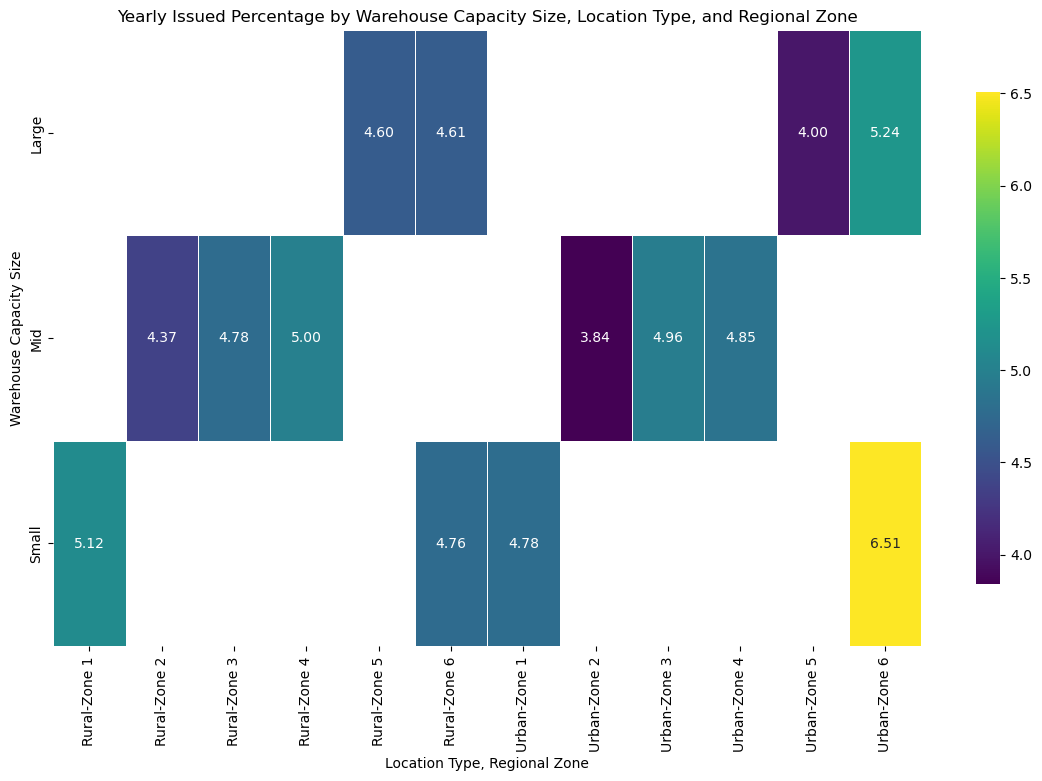

In [363]:
# Heatmap of the yearly percentage of issued transportation against averahe yearly demand requests calculated.

# Set up the Seaborn figure
plt.figure(figsize=(14, 8))

# Create a heatmap
sns.heatmap(table_data.pivot_table(index='WH_capacity_size', columns=['Location_type', 'WH_regional_zone'], 
                                   values='Yearly_issued_Percentage'),annot=True, fmt=".2f", cmap='viridis', 
            linewidths=.5, cbar_kws={"shrink": 0.8})

plt.title('Yearly Issued Percentage by Warehouse Capacity Size, Location Type, and Regional Zone')
plt.xlabel('Location Type, Regional Zone')
plt.ylabel('Warehouse Capacity Size')

# Show the plot
plt.show()


#### Summary:
* It is very clear that the business couldn't supply products to it's warehouses upon refill requests.
* The percentage of yeraly transportation supplied against average yearly refill reuests calculated as low as below 10%.
* We need additional information to check whether the refill requests were not catered becuased of lack of availability of finished goods on time or was the refill request quantity was lower than the minimum lot.

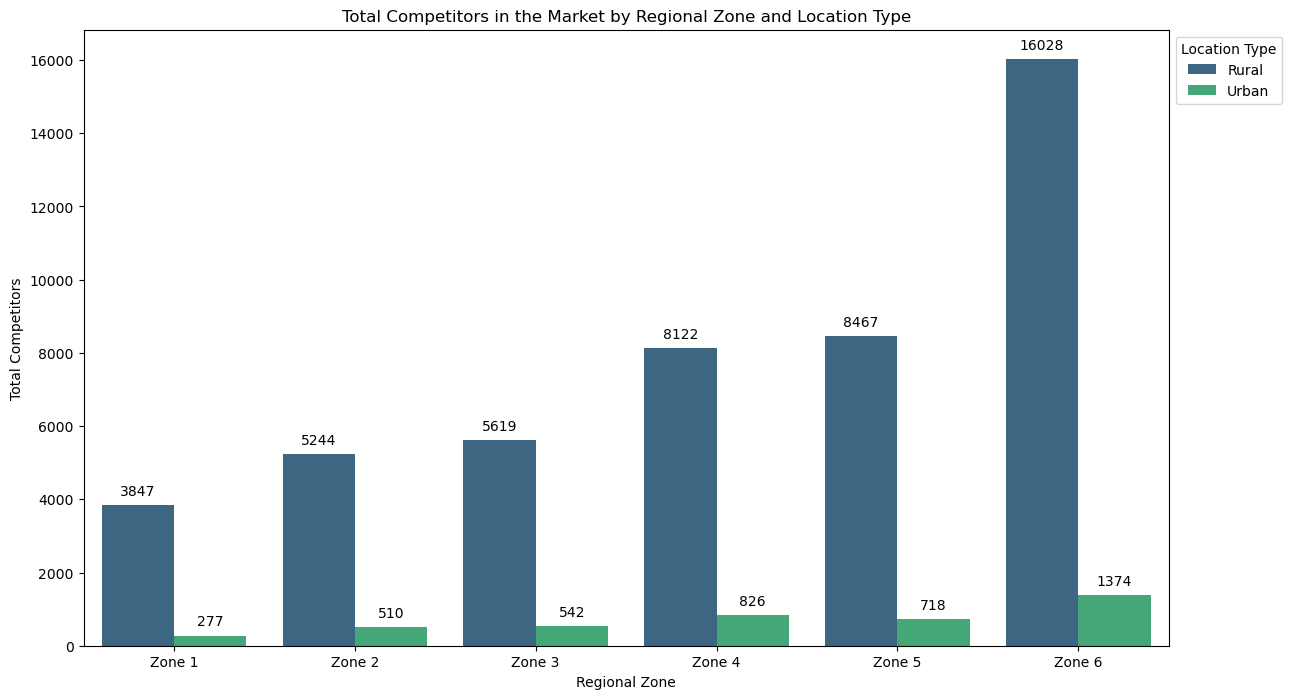

In [364]:
# Number of competitors in the market.
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'WH_regional_zone' and 'Location_type' and sum competitors in the market
competitor_sum = train_df.groupby(['WH_regional_zone', 'Location_type'])['Competitor_in_mkt'].sum().reset_index(name='Sum')

# Set up the seaborn figure
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Sum', hue='Location_type', data=competitor_sum, palette='viridis')

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Total Competitors')
plt.title('Total Competitors in the Market by Regional Zone and Location Type')
plt.legend(title='Location Type', bbox_to_anchor=(1, 1))

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()



#### Summary:
* Zone 6 have highest number of competitors followed by zone 5, zone 4, zone 3, zone 2 and zone 1. 

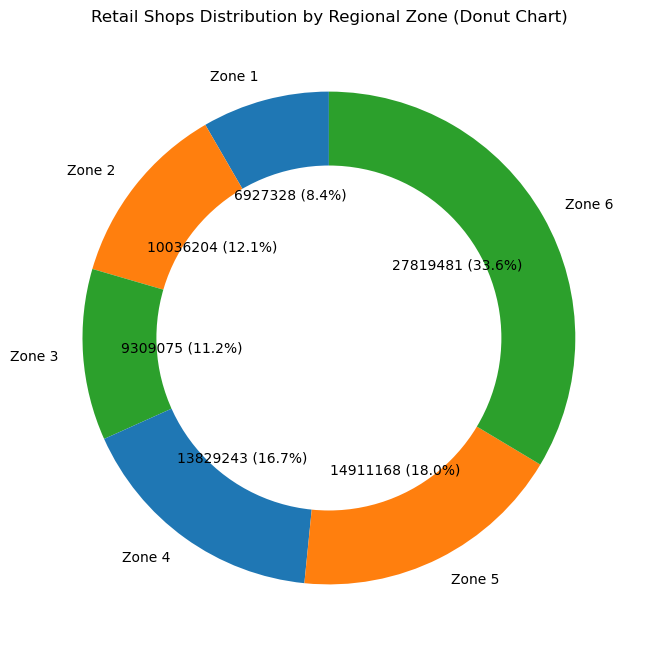

In [365]:
# Visualise sum of retail shop in each zone.

# Group by 'WH_regional_zone' and calculate the sum of retail_shop_num for each zone
zone_retail_shop_sum = train_df.groupby('WH_regional_zone')['retail_shop_num'].sum()

# Calculate the total sum of retail_shop_num across all zones
total_retail_shops = zone_retail_shop_sum.sum()

# Set up the labels, values, and custom colors for the donut chart
labels = zone_retail_shop_sum.index.astype(str)
values = zone_retail_shop_sum
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # You can customize this list for more zones

# Create a donut chart
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(values, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * total_retail_shops / 100, p),
       startangle=90, colors=custom_colors, wedgeprops=dict(width=0.4))

# Draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Retail Shops Distribution by Regional Zone (Donut Chart)')
plt.show()


##### Summary:
* The business have hihest retail shop in zone 6 followed by 5, 4,2,3 and 1.


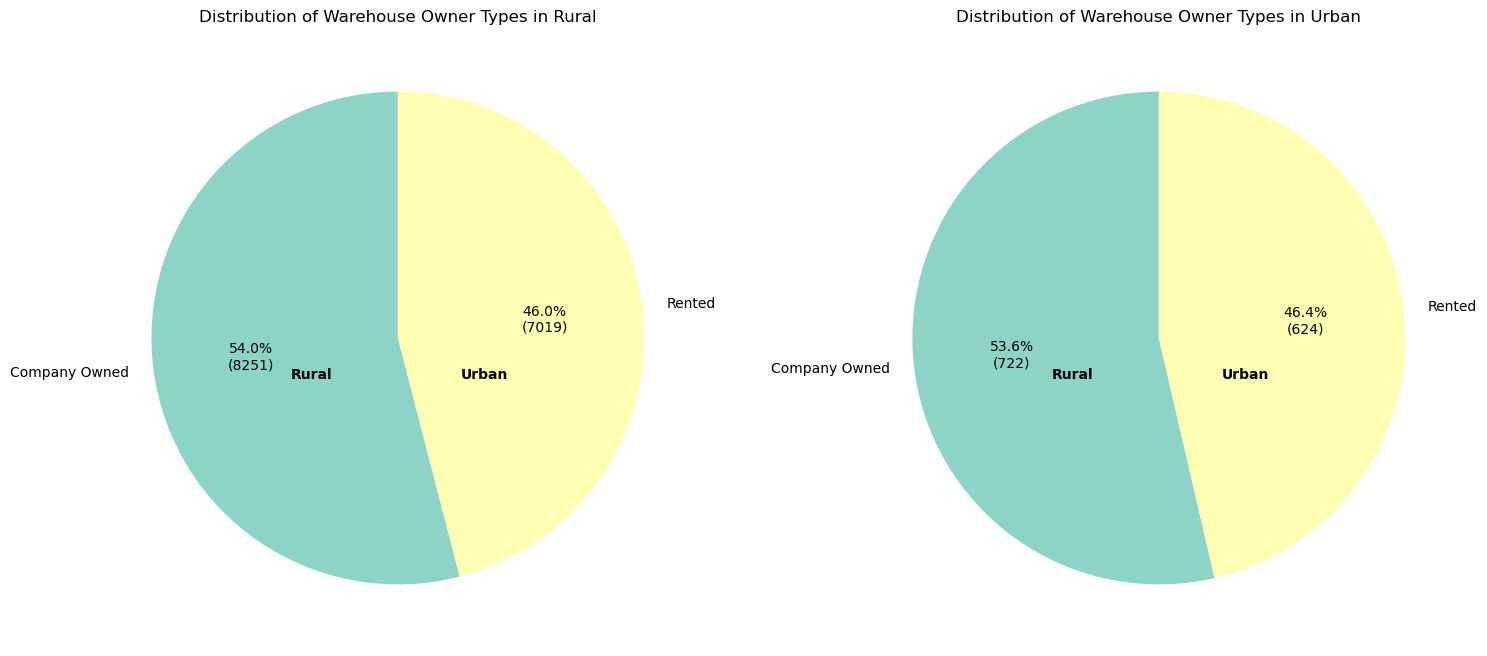

In [366]:
# Visualise the number of warehouse owned and rented by the company.
import matplotlib.pyplot as plt

# Separate the data into rural and urban
rural_data = train_df[train_df['Location_type'] == 'Rural']
urban_data = train_df[train_df['Location_type'] == 'Urban']

# Calculate the count of each 'wh_owner_type' for rural and urban
rural_owner_type_count = rural_data['wh_owner_type'].value_counts()
urban_owner_type_count = urban_data['wh_owner_type'].value_counts()

# Set up the labels, values, and colors for the pie charts
labels_rural = rural_owner_type_count.index.astype(str)
values_rural = rural_owner_type_count
colors_rural = plt.cm.Set3.colors  # You can choose a different color map if needed

labels_urban = urban_owner_type_count.index.astype(str)
values_urban = urban_owner_type_count
colors_urban = plt.cm.Set3.colors  # You can choose a different color map if needed

# Create subplots for rural and urban
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Create pie chart for rural
axs[0].pie(values_rural, labels=labels_rural,
           autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(p / 100 * values_rural.sum())),
           startangle=90, colors=colors_rural, textprops=dict(color="black"))
axs[0].set_title('Distribution of Warehouse Owner Types in Rural')

# Create pie chart for urban
axs[1].pie(values_urban, labels=labels_urban,
           autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(p / 100 * values_urban.sum())),
           startangle=90, colors=colors_urban, textprops=dict(color="black"))
axs[1].set_title('Distribution of Warehouse Owner Types in Urban')

# Add markers for 'Rural' and 'Urban'
for ax in axs:
    ax.text(0.35, -0.15, 'Urban', ha='center', va='center', color='black', fontsize=10, fontweight='bold')
    ax.text(-0.35, -0.15, 'Rural', ha='center', va='center', color='black', fontsize=10, fontweight='bold')

plt.show()





##### Summary:
* In rural area 54% of total warehouses own by company ie, 8251 numbers and 46% on rental.
* In urban area company have 46.4% retal warehouss and 53.6% own warehouses.


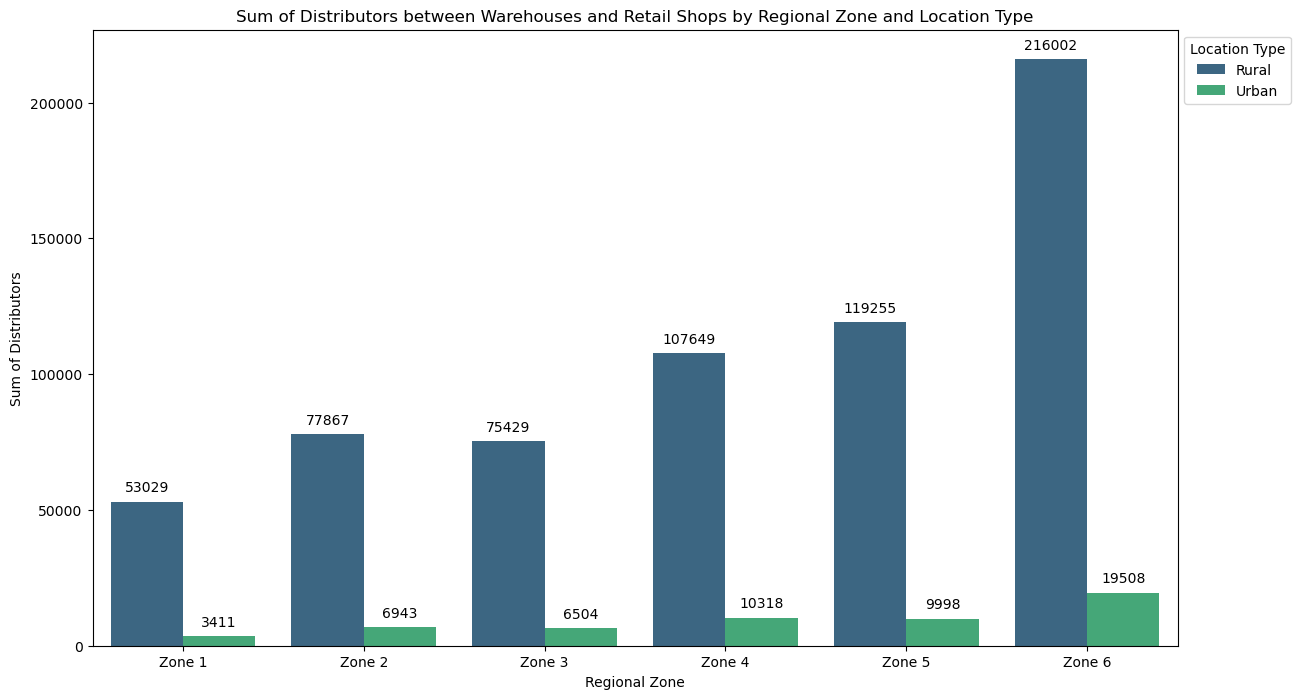

In [367]:
# Total number of distributors in each regional zone.

# Group by 'regional_zone' and 'Location_type' and calculate the sum of 'distributor_num'
distributor_sum = train_df.groupby(['WH_regional_zone', 'Location_type'])['distributor_num'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='distributor_num', hue='Location_type', data=distributor_sum, palette='viridis')

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Sum of Distributors')
plt.title('Sum of Distributors between Warehouses and Retail Shops by Regional Zone and Location Type')

# Add legend
plt.legend(title='Location Type', bbox_to_anchor=(1, 1))

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()




##### Summary:
* The number of distributors are almost proportionate to number of shops in each zone.
* Like hihest distributors in zone 6 followed by 5, 4,2,3 and 1.

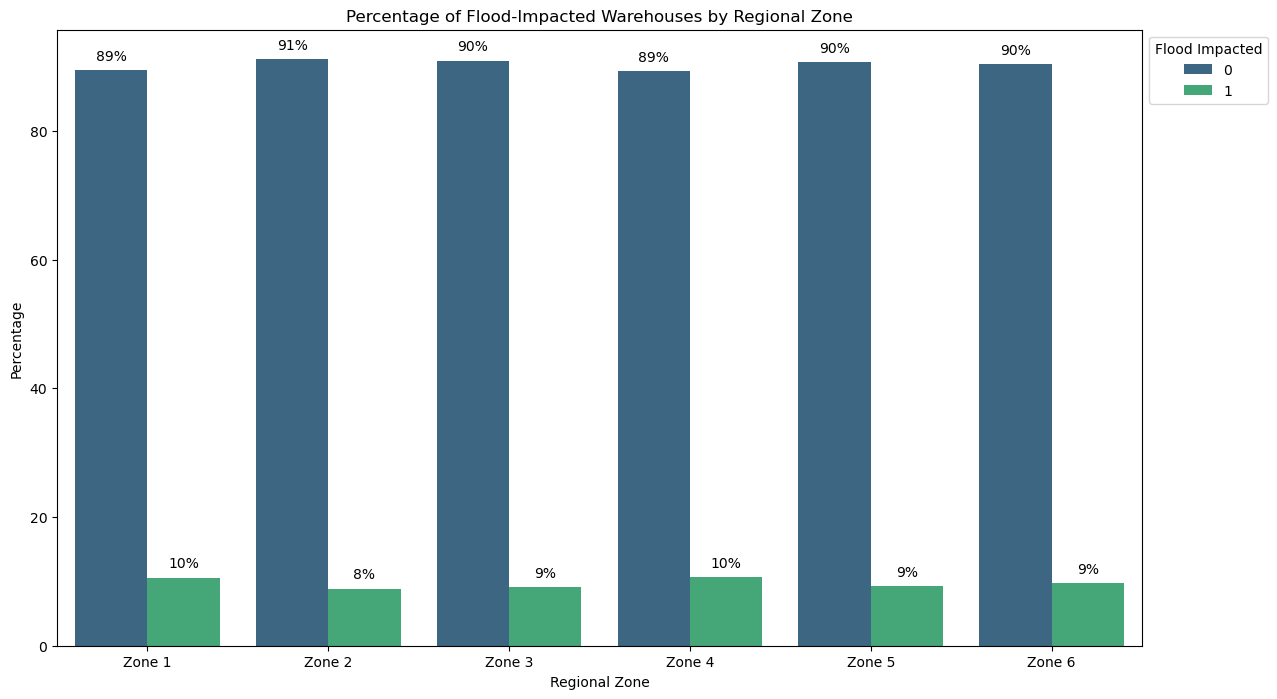

In [368]:
# Flood impacted warehouses.

# Calculate the total count of warehouses in each zone
total_count = train_df.groupby('WH_regional_zone').size().reset_index(name='Total Count')

# Group by 'WH_regional_zone' and 'flood_impacted' and calculate the count of warehouses
flood_impact_count = train_df.groupby(['WH_regional_zone', 'flood_impacted']).size().reset_index(name='Count')

# Merge the total count and flood impact count dataframes
merged_df = pd.merge(flood_impact_count, total_count, on='WH_regional_zone', how='outer')

# Calculate the percentage of flood-impacted warehouses
merged_df['Percentage'] = (merged_df['Count'] / merged_df['Total Count']) * 100

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Percentage', hue='flood_impacted', data=merged_df, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Percentage')
plt.title('Percentage of Flood-Impacted Warehouses by Regional Zone')

# Add legend
plt.legend(title='Flood Impacted', bbox_to_anchor=(1, 1))

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%',  # Display percentage
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Display the plot
plt.show()


##### Summary:
* Across all regional zones around 10% warehouses are flood affected. 
* Additiona information required to confirm others are flood proof warehouse of located away from flood affected area.

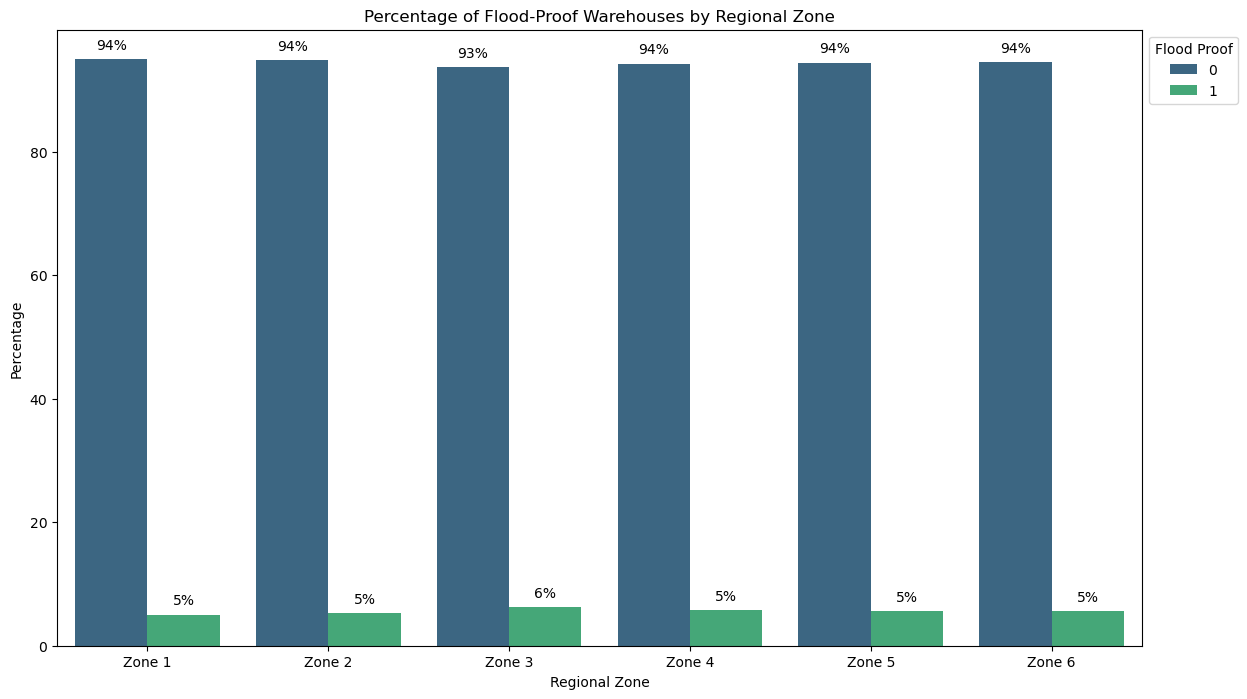

In [369]:
# Warehouse is having flood proof indicator or not.

# Calculate the total count of warehouses in each zone
total_count = train_df.groupby('WH_regional_zone').size().reset_index(name='Total Count')

# Group by 'WH_regional_zone' and 'flood_proof' and calculate the count of warehouses
flood_proof_count = train_df.groupby(['WH_regional_zone', 'flood_proof']).size().reset_index(name='Count')

# Merge the total count and flood proof count dataframes
merged_df_flood_proof = pd.merge(flood_proof_count, total_count, on='WH_regional_zone', how='outer')

# Calculate the percentage of flood-proof warehouses
merged_df_flood_proof['Percentage'] = (merged_df_flood_proof['Count'] / merged_df_flood_proof['Total Count']) * 100

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Percentage', hue='flood_proof', data=merged_df_flood_proof, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Percentage')
plt.title('Percentage of Flood-Proof Warehouses by Regional Zone')

# Add legend
plt.legend(title='Flood Proof', bbox_to_anchor=(1, 1))

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%',  # Display percentage
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* Regional zone 1,2,4,5 and 6 have 5% flood proof warehouses.
* Zone 3 have 6% flood proof warehouses.

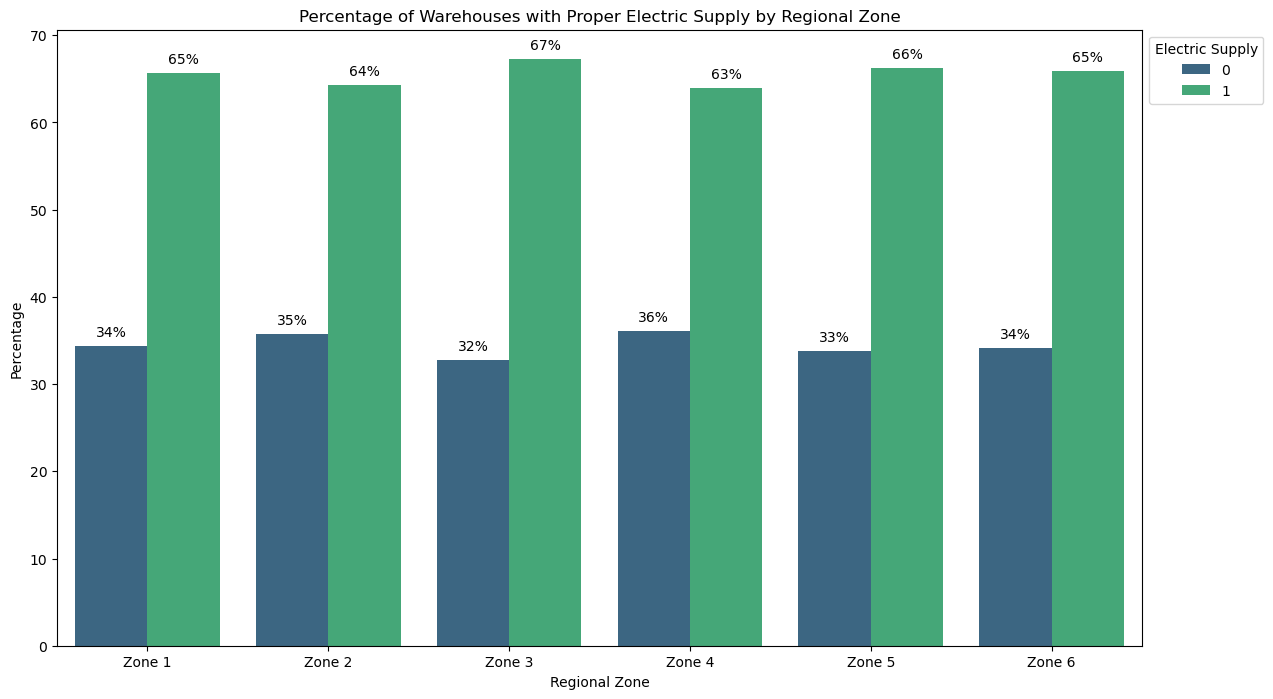

In [370]:
# Check how many warehouses have proper electric supply along with some power backup.
# Calculate the total count of warehouses in each zone
total_count = train_df.groupby('WH_regional_zone').size().reset_index(name='Total Count')

# Group by 'WH_regional_zone' and 'electric_supply' and calculate the count of warehouses
electric_supply_count = train_df.groupby(['WH_regional_zone', 'electric_supply']).size().reset_index(name='Count')

# Merge the total count and electric supply count dataframes
merged_df_electric_supply = pd.merge(electric_supply_count, total_count, on='WH_regional_zone', how='outer')

# Calculate the percentage of warehouses with proper electric supply
merged_df_electric_supply['Percentage'] = (merged_df_electric_supply['Count'] / merged_df_electric_supply['Total Count']) * 100

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Percentage', hue='electric_supply', data=merged_df_electric_supply, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Percentage')
plt.title('Percentage of Warehouses with Proper Electric Supply by Regional Zone')

# Add legend
plt.legend(title='Electric Supply', bbox_to_anchor=(1, 1))

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}%',  # Display percentage
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* Around 65% warehouses only have proper electricsupply along with some power backup.

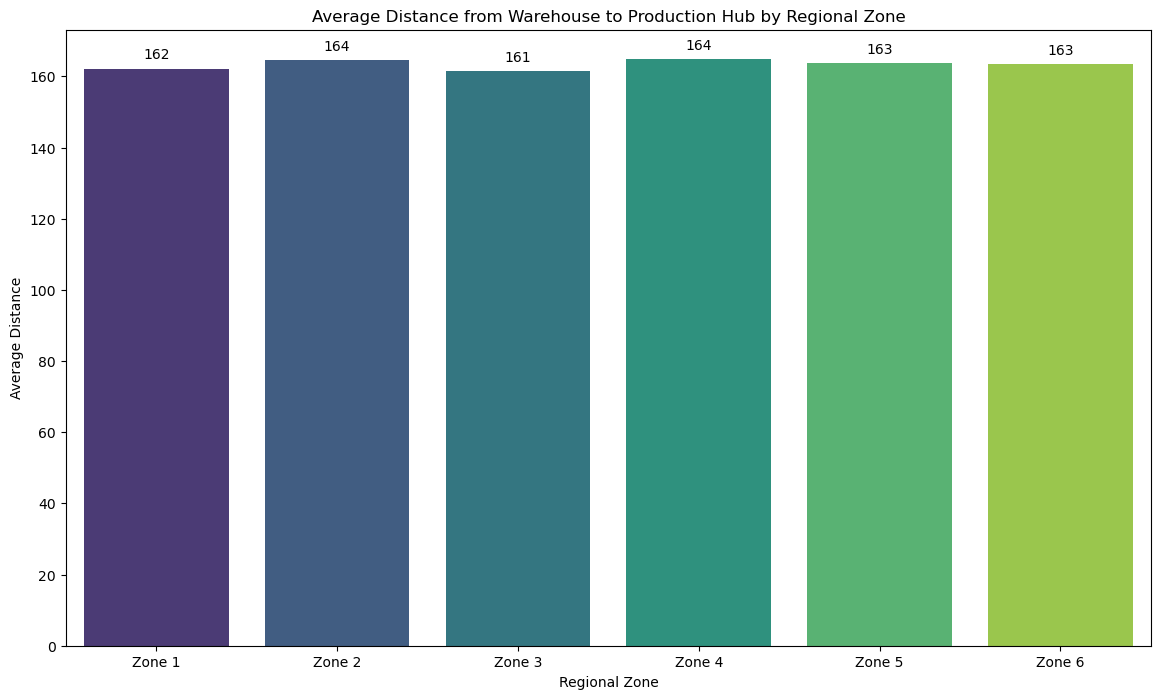

In [371]:
# Average distance from warehouse regional zone wise to production hub.

# Calculate the average distance for each regional zone
average_distance = train_df.groupby('WH_regional_zone')['dist_from_hub'].mean().reset_index(name='Average Distance')

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Average Distance', data=average_distance, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Average Distance')
plt.title('Average Distance from Warehouse to Production Hub by Regional Zone')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display average distance
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* The average distance of warehouses in all 6 zones are around 160 KM from production hub.

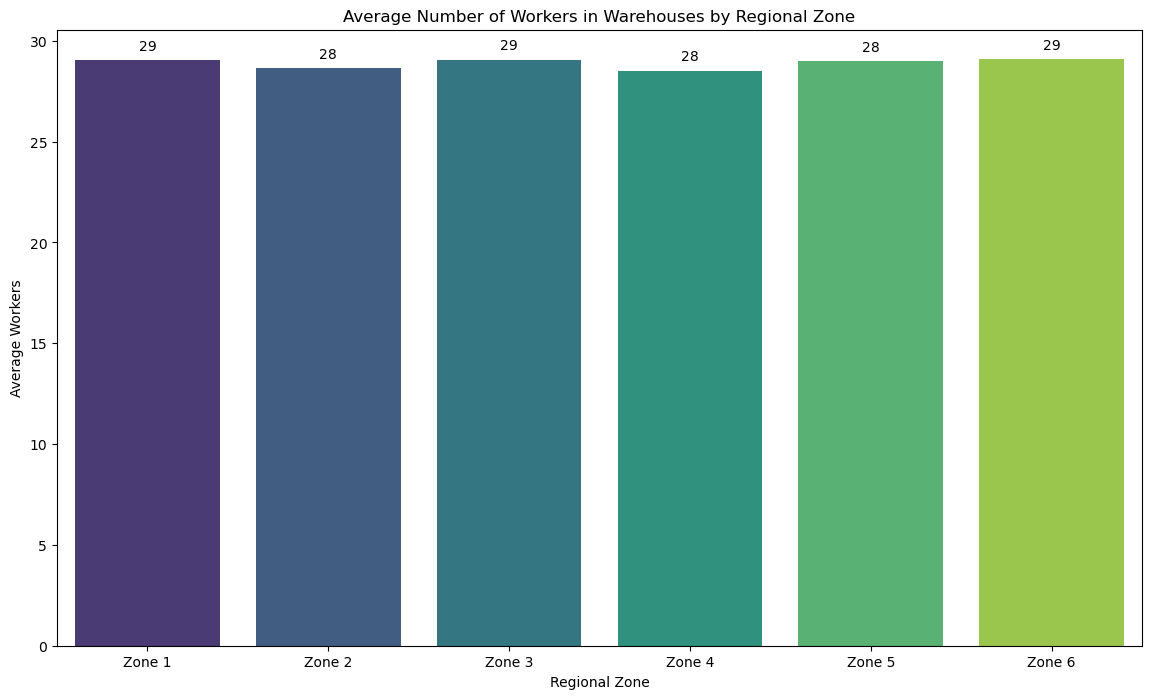

In [372]:
# Average Number of Workers in Warehouses by Regional Zone

# Calculate the average number of workers for each regional zone
average_workers = train_df.groupby('WH_regional_zone')['workers_num'].mean().reset_index(name='Average Workers')

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Average Workers', data=average_workers, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Average Workers')
plt.title('Average Number of Workers in Warehouses by Regional Zone')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display average number of workers
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* 28 to 29 average workers are employed in each warehouses under each regional zones.

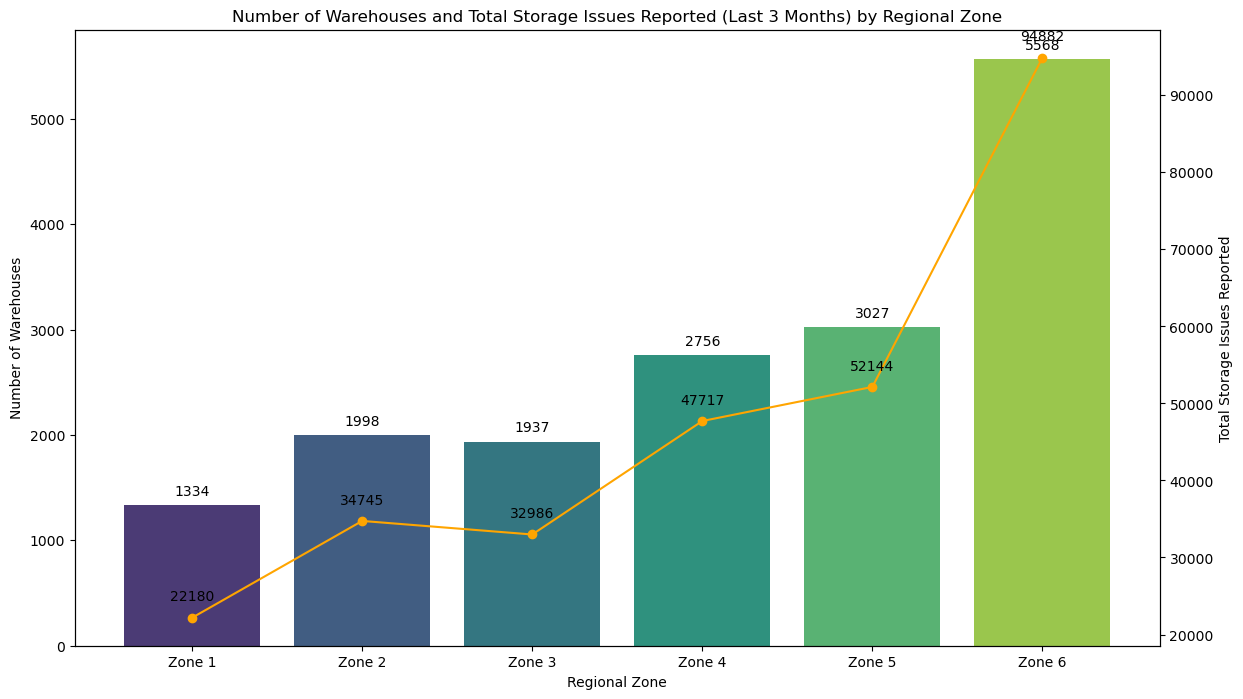

In [373]:
# Total storage issues reported in the last 3 months for each regional zone.

# Count the number of warehouses and total storage issues reported in the last 3 months for each regional zone
storage_reported_count = train_df.groupby('WH_regional_zone')['storage_issue_reported_l3m'].agg(['count', 'sum']).reset_index()

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='count', data=storage_reported_count, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Number of Warehouses')
plt.title('Number of Warehouses and Total Storage Issues Reported (Last 3 Months) by Regional Zone')

# Add a secondary y-axis for the total storage issues reported
ax2 = ax.twinx()
ax2.plot(storage_reported_count['WH_regional_zone'], storage_reported_count['sum'], color='orange', marker='o')
ax2.set_ylabel('Total Storage Issues Reported')

# Add value labels on top of each bar for the number of warehouses
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display number of warehouses
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add value labels on top of the line plot for the total storage issues reported
for i, txt in enumerate(storage_reported_count['sum']):
    ax2.annotate(f'{int(txt)}',  # Display total storage issues reported
                 (storage_reported_count['WH_regional_zone'][i], txt),
                 ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()



##### Summary:
* The storage issues reported in the last 3 months for each regional zone reflects the irrecoverable business opportunity loss.
* Need to analyse in details about the reasons for storage issues - may be flood, power supply issue, break down, temporature issue etc. That need to be addressed and resolved with immediate effect becuase optimum suppply quantity that they will get with the help of a prediction model but they have to take up the safety side of storage also. 
* Need to check whether the storage issue reorted becuase of non moving of goods or storage capacity is full. 

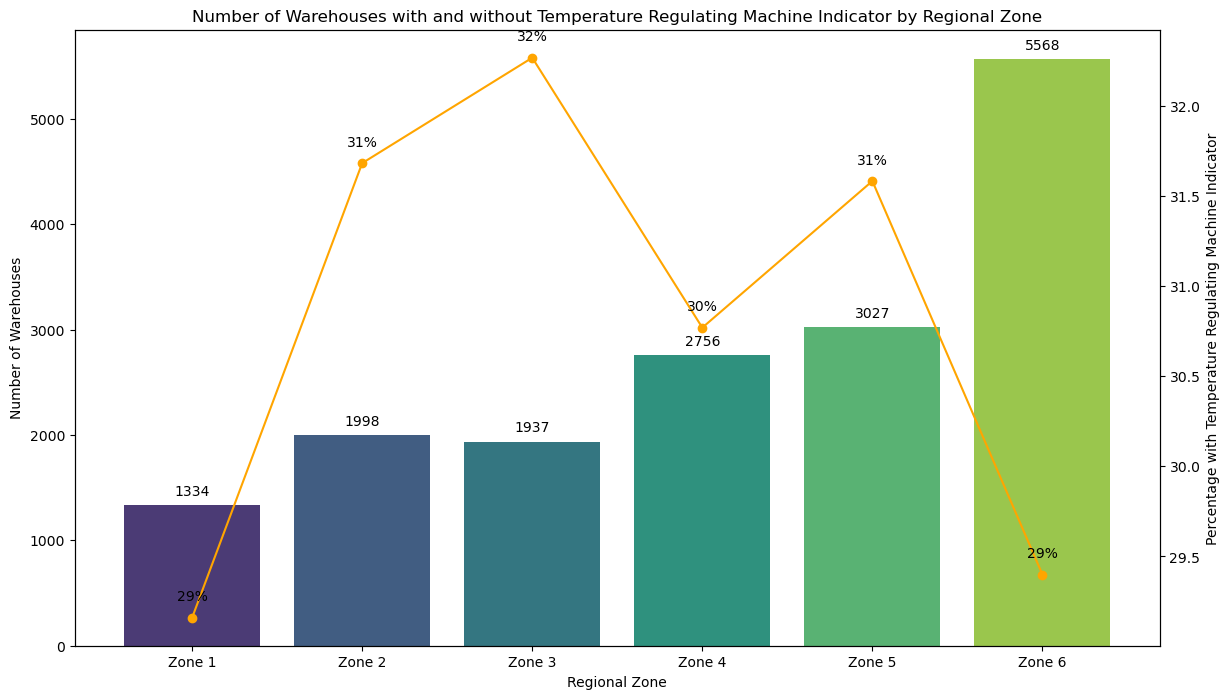

In [374]:
# Regional zone wise percentage of warehouses having temperature regulating machine indicator.

# Count the number of warehouses with and without temperature regulating machine indicator in each regional zone
temp_reg_count = train_df.groupby(['WH_regional_zone', 'temp_reg_mach']).size().unstack(fill_value=0).reset_index()

# Calculate the percentage of warehouses with temperature regulating machine indicator
temp_reg_count['Total'] = temp_reg_count[0] + temp_reg_count[1]
temp_reg_count['Percentage_Indicator'] = (temp_reg_count[1] / temp_reg_count['Total']) * 100

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Total', data=temp_reg_count, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Number of Warehouses')
plt.title('Number of Warehouses with and without Temperature Regulating Machine Indicator by Regional Zone')

# Add value labels for the total number of warehouses
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display total number of warehouses
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Create a secondary y-axis for the percentage of warehouses with temperature regulating machine indicator
ax2 = ax.twinx()
ax2.plot(temp_reg_count['WH_regional_zone'], temp_reg_count['Percentage_Indicator'], color='orange', marker='o')
ax2.set_ylabel('Percentage with Temperature Regulating Machine Indicator')

# Add value labels on top of the line plot for the percentage
for i, txt in enumerate(temp_reg_count['Percentage_Indicator']):
    ax2.annotate(f'{int(txt)}%',  # Display percentage
                 (temp_reg_count['WH_regional_zone'][i], txt),
                 ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* Around 30% of warehouse only have the temperature regulating machine indicator.
* This is a very importatnt safety feature of warehouse to make sure the goods are strored in required temperature to avoid perishability risk.
* It is good choose warehouses with more safety features like this to reduce business risk. 

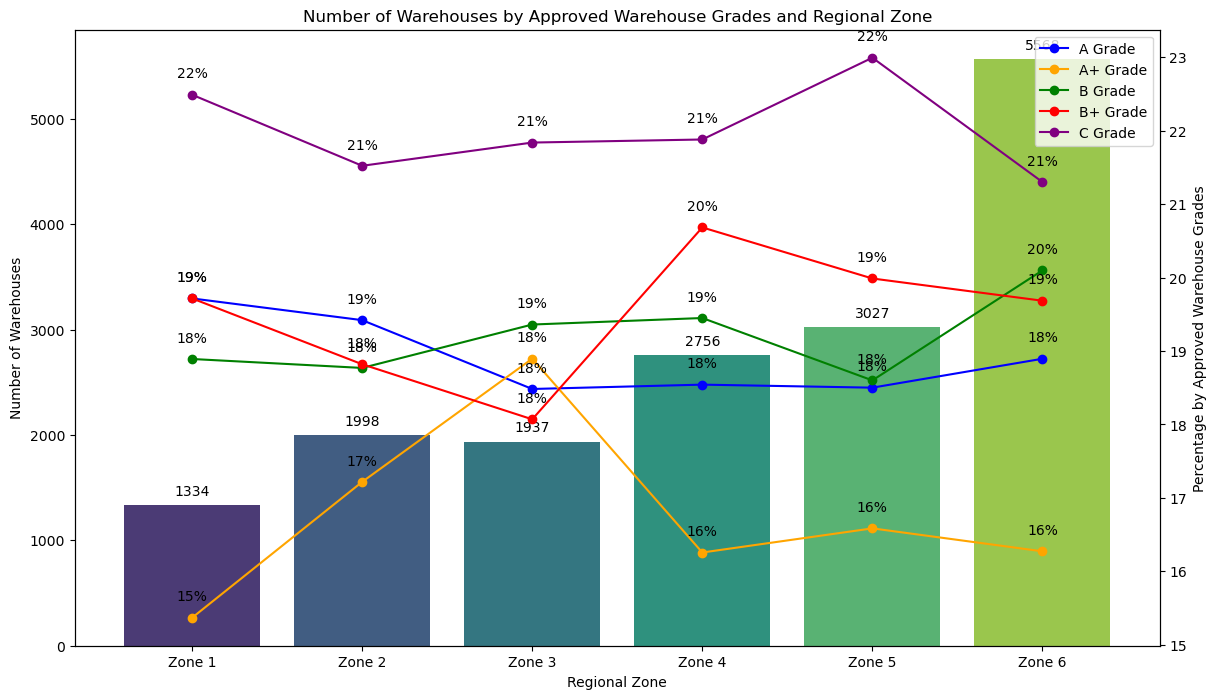

In [375]:
# warehouse grades in each regional zone

# Convert values in the 'approved_wh_govt_certificate' column to strings
train_df['approved_wh_govt_certificate'] = train_df['approved_wh_govt_certificate'].astype(str)

# Fill missing values in the 'approved_wh_govt_certificate' column with the mode
mode_value = train_df['approved_wh_govt_certificate'].mode().iloc[0]
train_df['approved_wh_govt_certificate'].fillna(mode_value, inplace=True)

# Count the number of warehouses for each grade in each regional zone
grade_count = train_df.groupby(['WH_regional_zone', 'approved_wh_govt_certificate']).size().unstack(fill_value=0).reset_index()

# Calculate the total number of warehouses in each regional zone
grade_count['Total'] = grade_count.sum(axis=1)

# Calculate the percentage of warehouses for each grade
for grade in ['A', 'A+', 'B', 'B+', 'C']:
    grade_count[f'Percentage_{grade}'] = (grade_count[grade] / grade_count['Total']) * 100

# Create a bar chart for the total number of warehouses
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Total', data=grade_count, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Number of Warehouses')
plt.title('Number of Warehouses by Approved Warehouse Grades and Regional Zone')

# Add value labels for the total number of warehouses
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display total number of warehouses
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Create a secondary y-axis for the percentage of warehouses for each grade
ax2 = ax.twinx()
grades = ['A', 'A+', 'B', 'B+', 'C']
colors = ['blue', 'orange', 'green', 'red', 'purple']

for grade, color in zip(grades, colors):
    ax2.plot(grade_count['WH_regional_zone'], grade_count[f'Percentage_{grade}'], color=color, marker='o', label=f'{grade} Grade')

ax2.set_ylabel('Percentage by Approved Warehouse Grades')

# Add a legend for the line plots
ax2.legend(loc='upper right')

# Add value labels on top of the line plots for the percentage
for grade in grades:
    for i, txt in enumerate(grade_count[f'Percentage_{grade}']):
        ax2.annotate(f'{int(txt)}%',  # Display percentage
                     (grade_count['WH_regional_zone'][i], txt),
                     ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* Most of the warehouses having govt approved C grade certification only. Which is the least or minimum amoung grades. 


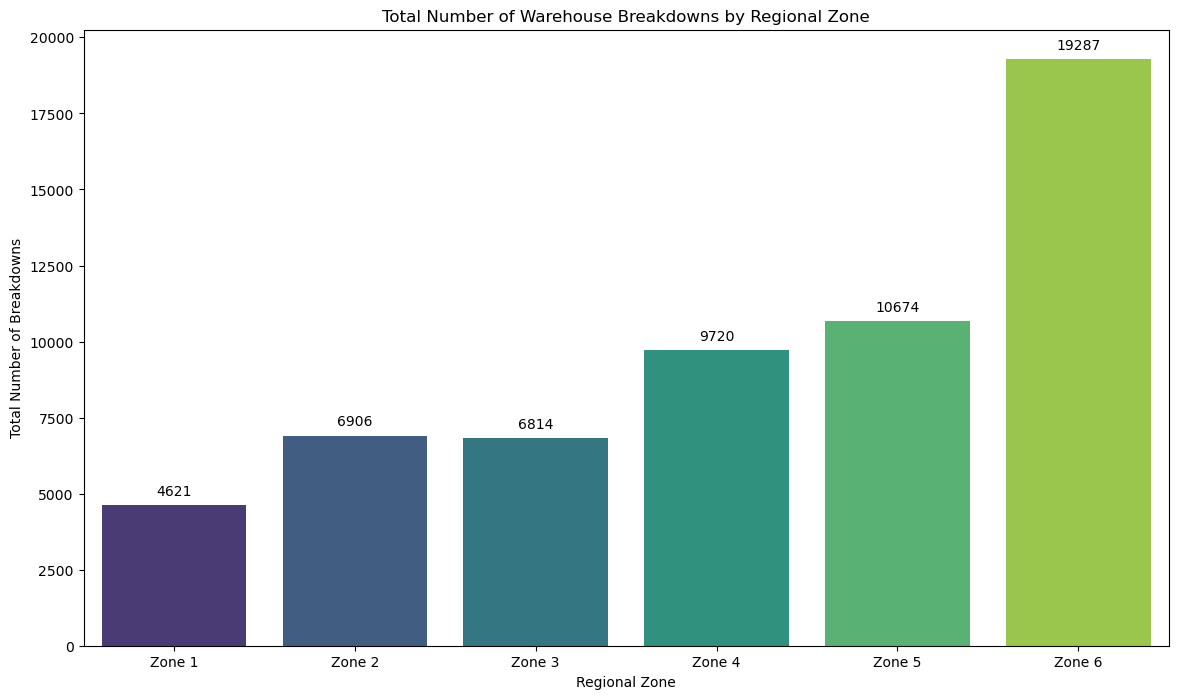

In [376]:
# Average of breakdowns in last 3 months

# Group by 'WH_regional_zone' and calculate the total number of breakdowns
breakdown_total = train_df.groupby('WH_regional_zone')['wh_breakdown_l3m'].sum().reset_index(name='Total_Breakdowns')

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Total_Breakdowns', data=breakdown_total, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Total Number of Breakdowns')
plt.title('Total Number of Warehouse Breakdowns by Regional Zone')

# Add value labels for the total number of breakdowns
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display total number of breakdowns
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()



##### Summary:
* The number of breakdowns in warehouses when we compare regional zone wise the number is pretty high.
* Need more investigattion about the cause and take corrective actions. 

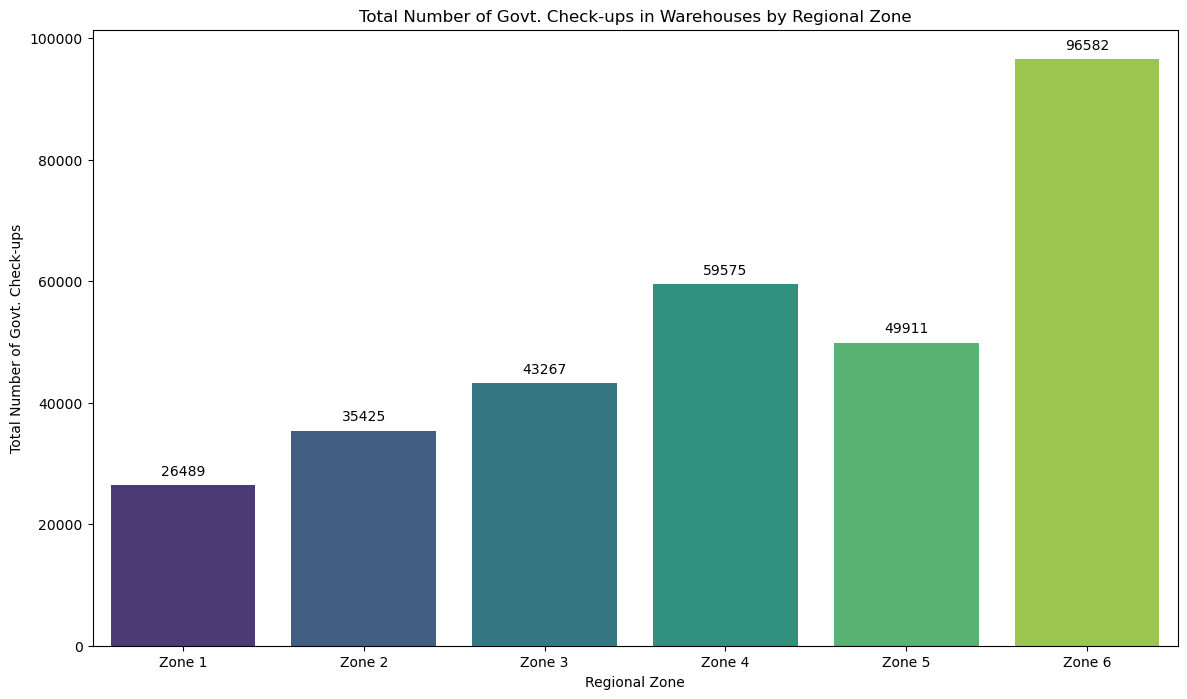

In [377]:
# Govt checks in last 3 months.
# Group by 'WH_regional_zone' and calculate the total number of govt. check-ups
govt_check_total = train_df.groupby('WH_regional_zone')['govt_check_l3m'].sum().reset_index(name='Total_Govt_Checks')

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Total_Govt_Checks', data=govt_check_total, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Total Number of Govt. Check-ups')
plt.title('Total Number of Govt. Check-ups in Warehouses by Regional Zone')

# Add value labels for the total number of govt. check-ups
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display total number of govt. check-ups
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* If the govt. check ups are high, the probability to keep the warehouse as per standard is directly correlated. 

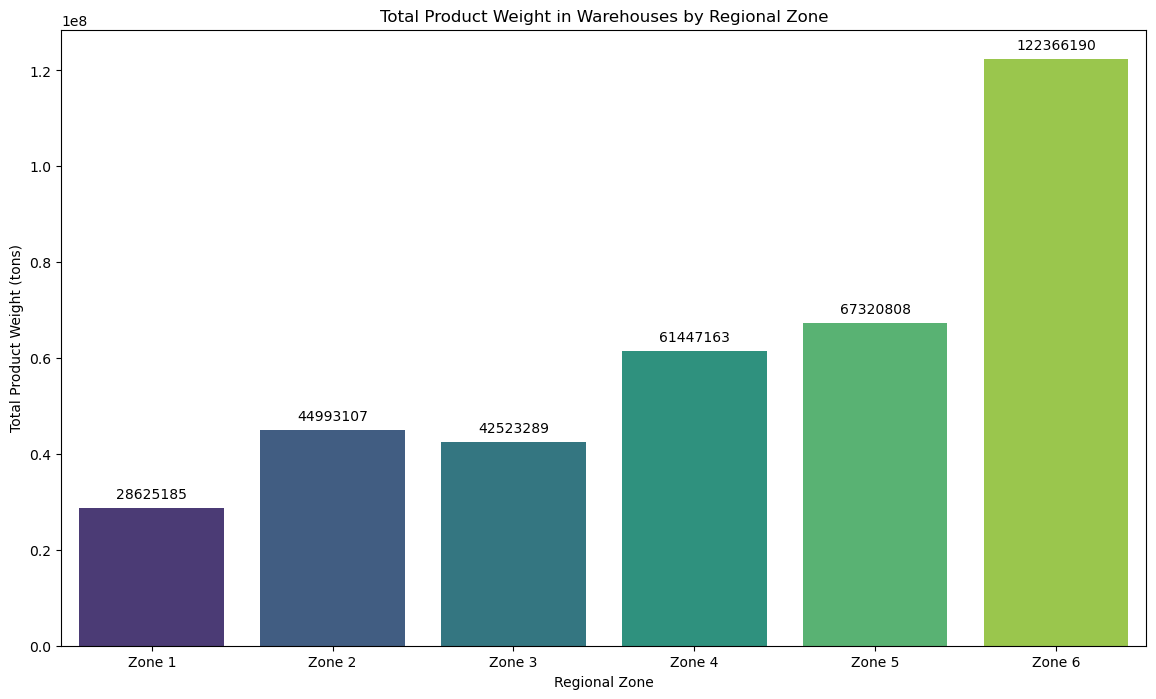

In [378]:
# Regional zone wise warehouse stocks (in ton = 1000 kg).
# Group by 'WH_regional_zone' and calculate the total product weight in tons
product_weight_total = train_df.groupby('WH_regional_zone')['product_wg_ton'].sum().reset_index(name='Total_Product_Weight')

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='WH_regional_zone', y='Total_Product_Weight', data=product_weight_total, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Total Product Weight (tons)')
plt.title('Total Product Weight in Warehouses by Regional Zone')

# Add value labels for the total product weight
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display total product weight
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


##### Summary:
* The goods are stored in 16620 warehouses of zone 0ne to Six. 
* The highest volume stored by zone 6 followed by 5,4,2,3 and 1.
* This is the clear indication that highest sale market is regional zone 6 and the lowest contributor zone 1.


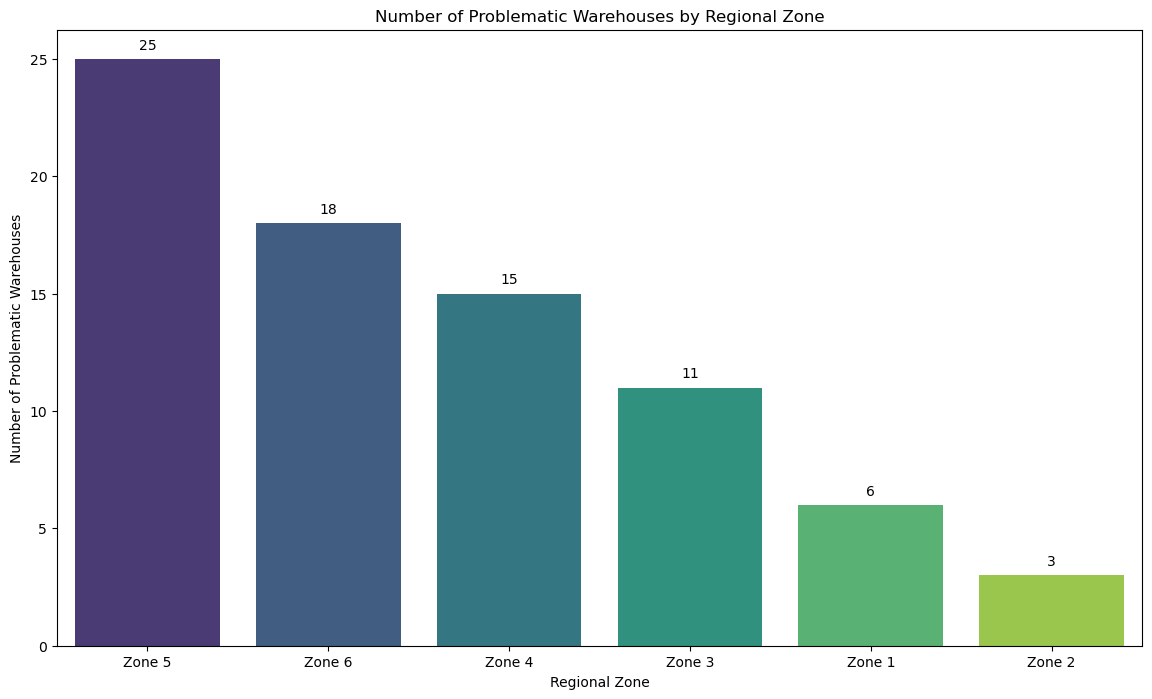

In [379]:
# Filter the data based on the specified conditions
problematic_warehouses = train_df[(train_df['flood_impacted'] == 1) & 
                                   (train_df['flood_proof'] == 0) & 
                                   (train_df['electric_supply'] == 0) & 
                                   (train_df['temp_reg_mach'] == 0) & 
                                   (train_df['wh_breakdown_l3m'] != 0)]

# Count the number of problematic warehouses in each regional zone
problematic_counts = problematic_warehouses['WH_regional_zone'].value_counts().reset_index(name='Warehouse_Count')

# Create a bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='index', y='Warehouse_Count', data=problematic_counts, palette='viridis', ci=None)

# Add labels and title
plt.xlabel('Regional Zone')
plt.ylabel('Number of Problematic Warehouses')
plt.title('Number of Problematic Warehouses by Regional Zone')

# Add value labels for the number of warehouses
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Display number of warehouses
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()



##### Summary:
* Above graph represents the number of ware houses which are very valnerable to safety measures.
* These warehouses have all concerns together like flood impacted area but not flood proof, not having proper electric supply or power backups, not having temperature regulating machine indicator and they are reported warehouse breakdown in last 3 months.

## Step 3 : DATA PREPROCESSING

#### Treat missing values, duplicate values and outliers.

In [380]:
# Warehouse ID having unique values and are not required for model development - so drop.
train_df.drop(['Ware_house_ID'], axis=1, inplace= True)
validation_df.drop(['Ware_house_ID'], axis=1, inplace= True)

In [381]:
# Check duplicates in dataset train_df
train_df.duplicated().sum()

0

In [382]:
# Missing values check
train_df.isnull().sum()*100/len(train_df)

Location_type                   0.0
WH_capacity_size                0.0
zone                            0.0
WH_regional_zone                0.0
num_refill_req_l3m              0.0
transport_issue_l1y             0.0
Competitor_in_mkt               0.0
retail_shop_num                 0.0
wh_owner_type                   0.0
distributor_num                 0.0
flood_impacted                  0.0
flood_proof                     0.0
electric_supply                 0.0
dist_from_hub                   0.0
workers_num                     0.0
storage_issue_reported_l3m      0.0
temp_reg_mach                   0.0
approved_wh_govt_certificate    0.0
wh_breakdown_l3m                0.0
govt_check_l3m                  0.0
product_wg_ton                  0.0
yearly_demand                   0.0
dtype: float64

#### Feature encoding.

* Label encoding is good when there is a any inhearant order in numerical value (If the categories have no such order, and they are just labels without any inherent ranking, one-hot encoding is often preferred to avoid introducing unintended relationships.).
* One hot encoding suitable for nominal discret(categorical-no order) values that does not assume any order priority relationship (a metrix will create with 0 and 1)
* Ordinal Encoding suitable for ordinal discret(categorical- with order like rank/grade).
* Target Encoding suitable for use mean of the 'target variable'.

In [383]:
train_df.dtypes

Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int32
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
yearly_demand                     int64
dtype: object

In [384]:
# identify categorical object type values.
categorical_features =train_df.select_dtypes(include="object")
categorical_features.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')

In [385]:
# created two list for two type of encoding.
LabelEncode_list=['WH_regional_zone', 'approved_wh_govt_certificate']
OneHot_categorical_list=['Location_type', 'WH_capacity_size', 'zone','wh_owner_type']

In [386]:
# Categorical columns for label encoding
LabelEncode_list = ['WH_regional_zone', 'approved_wh_govt_certificate']

# One-hot encoding columns
OneHot_categorical_list = ['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type']

# Applying label encoding for more unique values containing columns to reduce dimension
label_encoder = LabelEncoder()
for col in LabelEncode_list:
    train_df[col] = label_encoder.fit_transform(train_df[col])

# One-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=OneHot_categorical_list, prefix=OneHot_categorical_list, drop_first=True)

# Convert all columns to numeric
train_df_encoded = train_df_encoded.apply(pd.to_numeric, errors='ignore')


In [387]:
train_df_encoded.head(5)
train_df_encoded.shape
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   WH_regional_zone              16620 non-null  int32  
 1   num_refill_req_l3m            16620 non-null  int64  
 2   transport_issue_l1y           16620 non-null  int32  
 3   Competitor_in_mkt             16620 non-null  int64  
 4   retail_shop_num               16620 non-null  int64  
 5   distributor_num               16620 non-null  int64  
 6   flood_impacted                16620 non-null  int64  
 7   flood_proof                   16620 non-null  int64  
 8   electric_supply               16620 non-null  int64  
 9   dist_from_hub                 16620 non-null  int64  
 10  workers_num                   16620 non-null  float64
 11  storage_issue_reported_l3m    16620 non-null  int64  
 12  temp_reg_mach                 16620 non-null  int64  
 13  a

##### Checking correlation of features by heatmap.

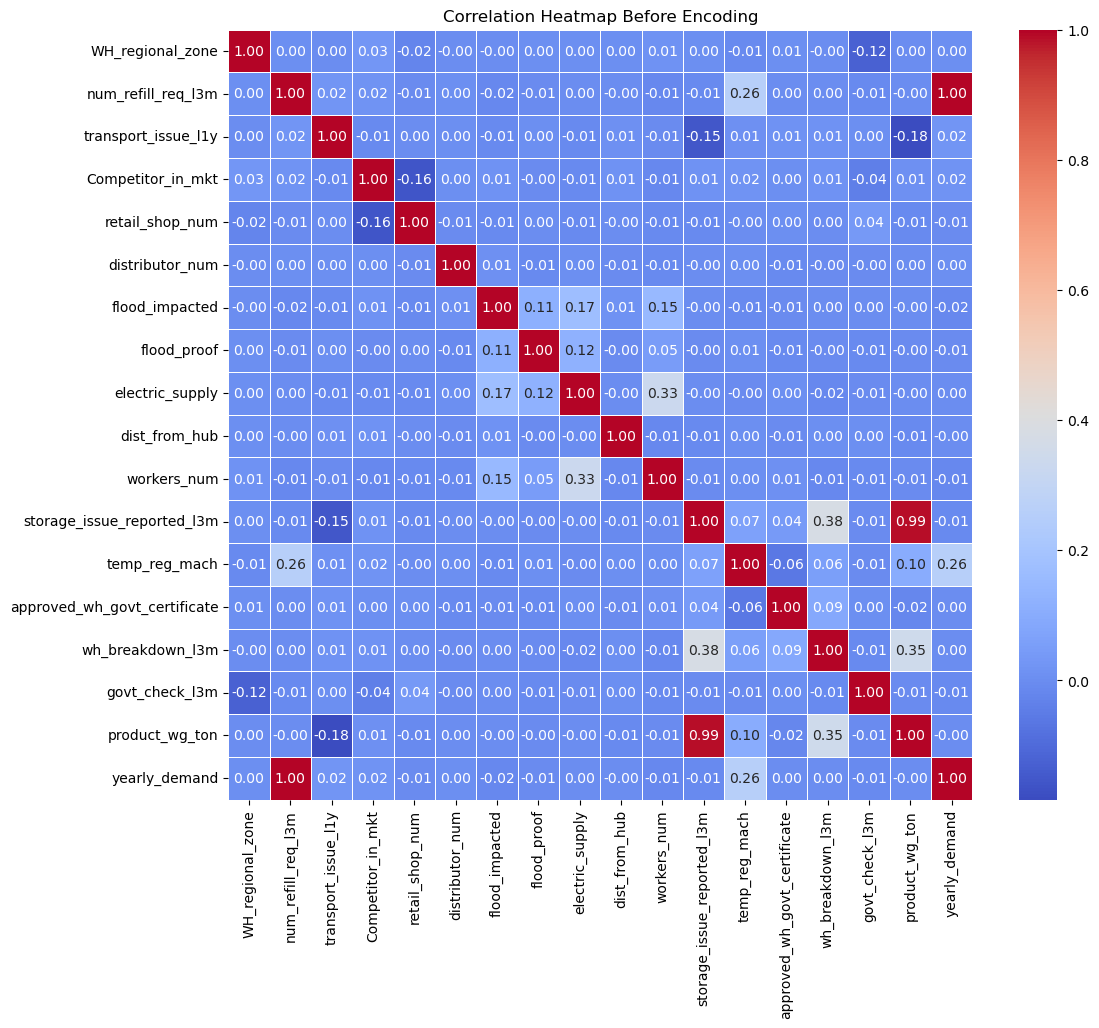

In [388]:
# correlation heat map before encoing.

corr_before_encoding = train_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_before_encoding, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Before Encoding')
plt.show()


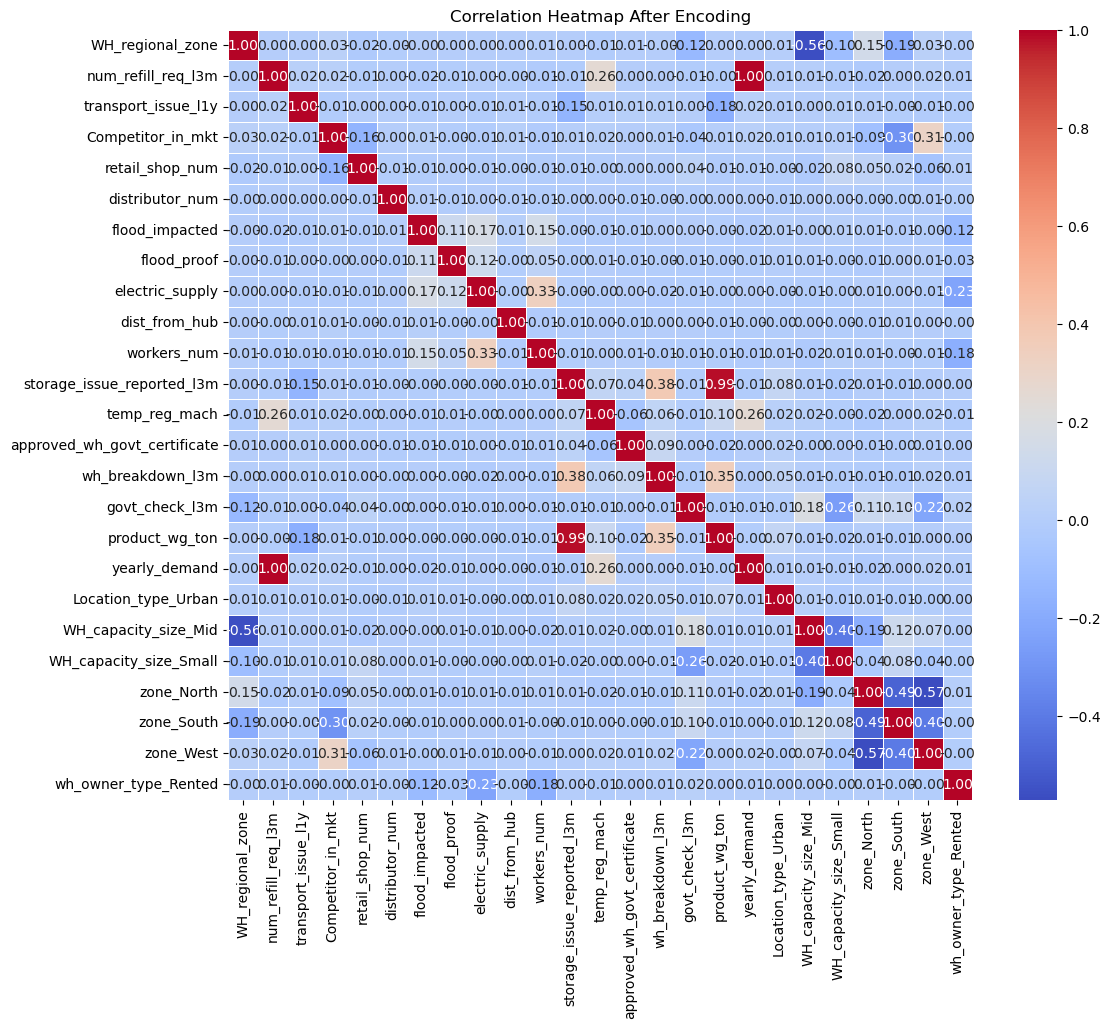

In [389]:
# correlation heat map after encoing.

corr_after_encoding = train_df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_after_encoding, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap After Encoding')
plt.show()


In [390]:
train_df_encoded.describe()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,govt_check_l3m,product_wg_ton,yearly_demand,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,...,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,3.254392,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,...,18.727377,22098.420096,16.506619,0.081107,0.402587,0.191697,0.409146,0.254091,0.320096,0.459988
std,1.666568,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,...,8.619857,11620.337346,10.424962,0.273008,0.490434,0.393648,0.491691,0.435362,0.466527,0.498411
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,...,1.000000,2093.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,...,11.000000,13057.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,...,19.000000,22099.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,...,26.000000,30103.000000,24.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,...,32.000000,55151.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### checking outliers with help of various graphical represetations also.

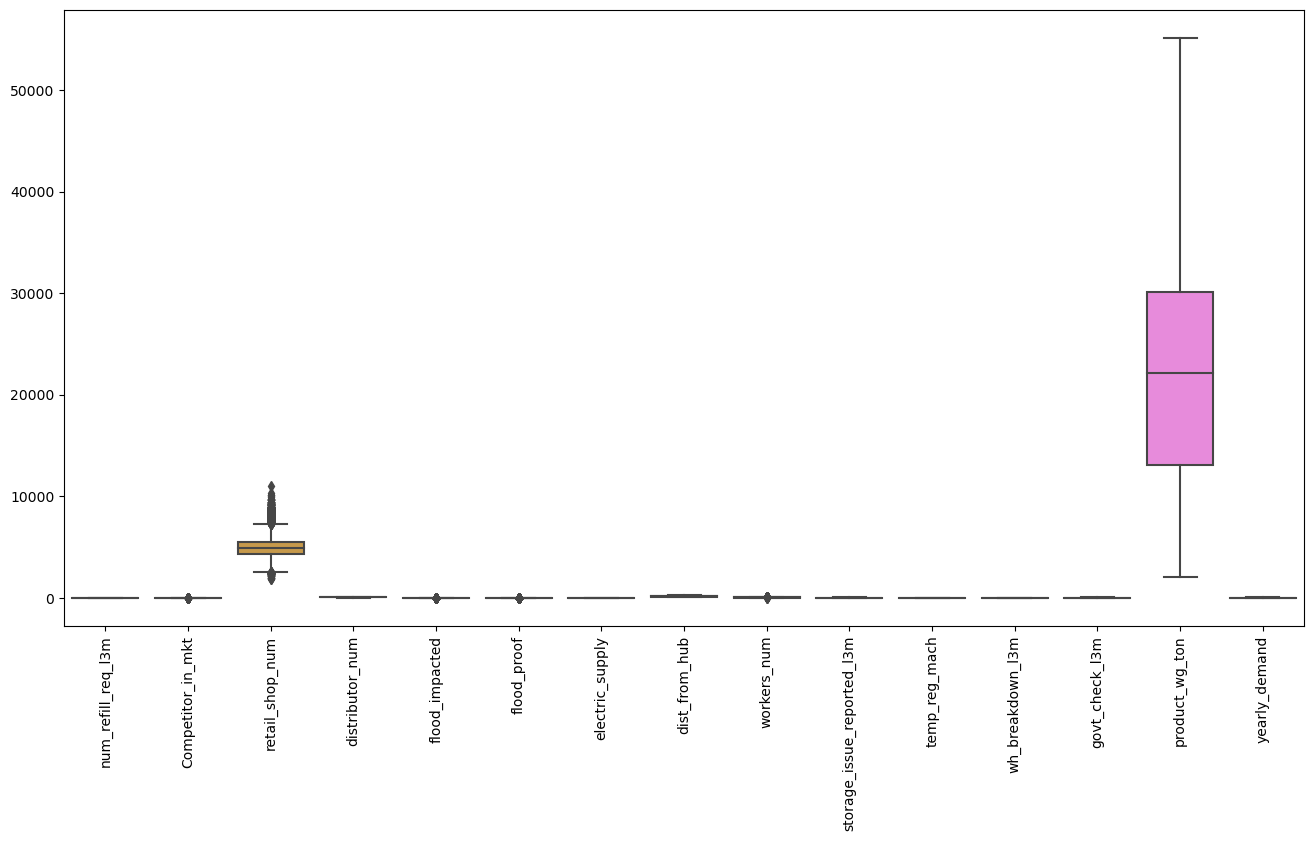

In [391]:
# BOXPLOT

# Select numerical columns
numerical_columns = train_df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for numerical features
plt.figure(figsize=(16, 8))
sns.boxplot(data=train_df_encoded[numerical_columns])
plt.xticks(rotation=90)
plt.show()


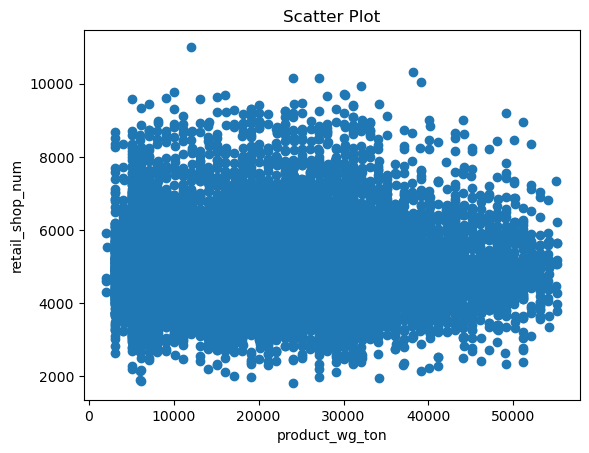

In [392]:
# Scatter plot

# Select a pair of numerical columns for scatter plot
plt.scatter(train_df_encoded['product_wg_ton'], train_df_encoded['retail_shop_num'])
plt.xlabel('product_wg_ton')
plt.ylabel('retail_shop_num')
plt.title('Scatter Plot')
plt.show()


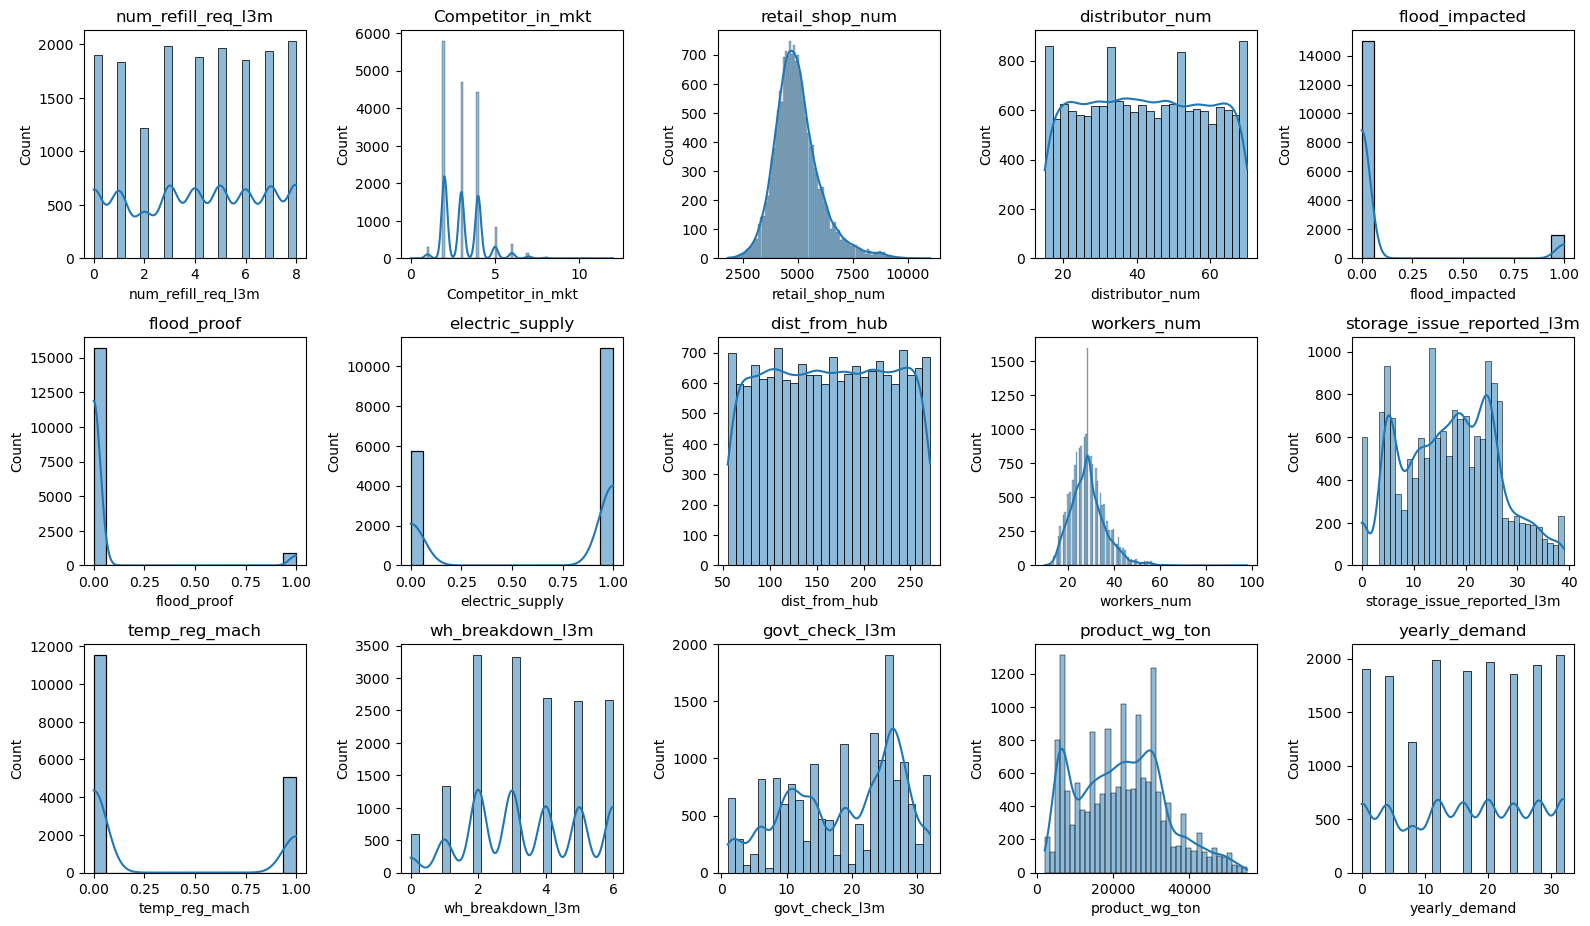

In [393]:
# checking ditribution values of each features. 

# Select numerical columns
numerical_columns = train_df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Create distribution plots for numerical features
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(train_df_encoded[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


###### I think there is no major outliers in this dataset and the distribution justifies the feature. so we can proceed .

#### Drop the depended variable and split the training dataset into train and test sets 


In [394]:
x = train_df_encoded.drop(['product_wg_ton'], axis = 1)
y = train_df_encoded['product_wg_ton']

#### Split the train dataset for train 80 % & test 20%

In [395]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random_state = 42 is a random number, 
# When we set a specific random_state, the data split will be the same every time you run the code, making your results more consistent and reproducible.
# Display the shapes of the resulting sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (13296, 24)
x_test shape: (3324, 24)
y_train shape: (13296,)
y_test shape: (3324,)


#### Feature Scaling

In [396]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## Step 4 : Model Building.

In [397]:
# objective is to determine optimum weight to be shipped - regression model. 
# Classification models decision tree, random forest and it's confusion metrix has been created memmory intensive errors for this dataset]
# Create a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

In [398]:
# Dictionary to store model performances
model_performances = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Evaluate model performance by evaluating error.

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{model_name} Mean Absolute Error (MAE): {mae}')
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name} Mean Squared Error (MSE): {mse}')
    
    # Root Mean Squared Error (RMSE)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{model_name} Root Mean Squared Error (RMSE): {rmse}')

    # R-squared (R2 Score)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} R-squared (R2 Score): {r2}')

    # Store the performance metrics in the dictionary
    model_performances[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Print the overall model performances
for model_name, metrics in model_performances.items():
    print(f'\n{model_name} Performance Metrics:')
    print(f'Mean Absolute Error (MAE): {metrics["MAE"]}')
    print(f'Mean Squared Error (MSE): {metrics["MSE"]}')
    print(f'Root Mean Squared Error (RMSE): {metrics["RMSE"]}')
    print(f'R-squared (R2 Score): {metrics["R2"]}')


Linear Regression Mean Absolute Error (MAE): 1213.6560866414166
Linear Regression Mean Squared Error (MSE): 2636279.460892302
Linear Regression Root Mean Squared Error (RMSE): 1623.6623604962647
Linear Regression R-squared (R2 Score): 0.9805862499489921
Lasso Regression Mean Absolute Error (MAE): 1213.702206815277
Lasso Regression Mean Squared Error (MSE): 2636788.6595623256
Lasso Regression Root Mean Squared Error (RMSE): 1623.8191585156044
Lasso Regression R-squared (R2 Score): 0.9805825001736542
Ridge Regression Mean Absolute Error (MAE): 1213.6552719967333
Ridge Regression Mean Squared Error (MSE): 2636279.589153092
Ridge Regression Root Mean Squared Error (RMSE): 1623.6623999936353
Ridge Regression R-squared (R2 Score): 0.9805862490044706
KNeighbors Regressor Mean Absolute Error (MAE): 6761.788026474127
KNeighbors Regressor Mean Squared Error (MSE): 70637689.96569194
KNeighbors Regressor Root Mean Squared Error (RMSE): 8404.6231304974
KNeighbors Regressor R-squared (R2 Score): 0.4

## Step 5 : Selection of best model and validate with new validation dataset.

In [399]:
# Find the best model based on the lowest RMSE

best_model = min(model_performances, key=lambda x: model_performances[x]['RMSE'])

# Print the performance metrics for the best model
print(f'\nBest Model: {best_model}')
print(f'Mean Absolute Error (MAE): {model_performances[best_model]["MAE"]}')
print(f'Mean Squared Error (MSE): {model_performances[best_model]["MSE"]}')
print(f'Root Mean Squared Error (RMSE): {model_performances[best_model]["RMSE"]}')



Best Model: Random Forest Regressor
Mean Absolute Error (MAE): 723.9484235860409
Mean Squared Error (MSE): 963318.1618238267
Root Mean Squared Error (RMSE): 981.4877288197886


#### The best fit model is : Random Forest Regressor with least error amoung other models and higher R-squared (R2 Score)

#### Let's validate this model with validation dataset also.

In [400]:
# Let's label encode 'WH_regional_zone' and 'approved_wh_govt_certificate' 
label_encode_columns = ['WH_regional_zone', 'approved_wh_govt_certificate']

# 'Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type' are one-hot encoded columns
one_hot_encode_columns = ['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type']

# Create a LabelEncoder and apply it to specified columns
label_encoder = LabelEncoder()
for col in label_encode_columns:
    validation_df[col] = label_encoder.fit_transform(validation_df[col].astype(str))

# Create dummy variables for one-hot encoding
validation_df_encoded = pd.get_dummies(validation_df, columns=one_hot_encode_columns, prefix=one_hot_encode_columns, drop_first=True)

# Convert one hot encoded columns to numeric
validation_df_encoded = validation_df_encoded.apply(pd.to_numeric, errors='ignore')


In [401]:
validation_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   WH_regional_zone              5529 non-null   int32  
 1   num_refill_req_l3m            5529 non-null   int64  
 2   transport_issue_l1y           5529 non-null   int64  
 3   Competitor_in_mkt             5529 non-null   int64  
 4   retail_shop_num               5529 non-null   int64  
 5   distributor_num               5529 non-null   int64  
 6   flood_impacted                5529 non-null   int64  
 7   flood_proof                   5529 non-null   int64  
 8   electric_supply               5529 non-null   int64  
 9   dist_from_hub                 5529 non-null   int64  
 10  workers_num                   5529 non-null   float64
 11  storage_issue_reported_l3m    5529 non-null   int64  
 12  temp_reg_mach                 5529 non-null   int64  
 13  app

In [402]:
# Standardize the features using StandardScaler
# Separate features (X) and target variable (y) in the validation dataset
x_val = validation_df_encoded.drop(['product_wg_ton'], axis=1)
y_val = validation_df_encoded['product_wg_ton']

# Standardize the features using StandardScaler
scaler = StandardScaler()
x_val_scaled = scaler.fit_transform(x_val)


In [403]:
print("Columns in trained df x_train:", x_train.columns)
print("Columns in validation df x_val(after preprocessing):", x_val.columns)

Columns in trained df x_train: Index(['WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'yearly_demand', 'Location_type_Urban', 'WH_capacity_size_Mid',
       'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West',
       'wh_owner_type_Rented'],
      dtype='object')
Columns in validation df x_val(after preprocessing): Index(['WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m

In [404]:
# checking order and total number of columns.

# Check if columns are in the same order
if all(x_train.columns == x_val.columns):
    print("Columns are in the same order.")
else:
    print("Columns are NOT in the same order.")

# Check if the number of columns is the same
if len(x_train.columns) == len (x_val.columns):
    print("Number of columns is the same.")
else:
    print("Number of columns is NOT the same.")
    

Columns are in the same order.
Number of columns is the same.


In [405]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   WH_regional_zone              5529 non-null   int32  
 1   num_refill_req_l3m            5529 non-null   int64  
 2   transport_issue_l1y           5529 non-null   int64  
 3   Competitor_in_mkt             5529 non-null   int64  
 4   retail_shop_num               5529 non-null   int64  
 5   distributor_num               5529 non-null   int64  
 6   flood_impacted                5529 non-null   int64  
 7   flood_proof                   5529 non-null   int64  
 8   electric_supply               5529 non-null   int64  
 9   dist_from_hub                 5529 non-null   int64  
 10  workers_num                   5529 non-null   float64
 11  storage_issue_reported_l3m    5529 non-null   int64  
 12  temp_reg_mach                 5529 non-null   int64  
 13  app

In [406]:
# Test of best fit model with validation file.
best_model = RandomForestRegressor() 

# Fit the model on the training data with feature names
best_model.fit(x_train, y_train)

# Make predictions on the scaled validation set
y_val_pred = best_model.predict(x_val_scaled)


# Evaluate model performance on the validation set

# Mean Absolute Error (MAE)
mae_val = mean_absolute_error(y_val, y_val_pred)
print(f'Validation Mean Absolute Error (MAE): {mae_val}')

# Mean Squared Error (MSE)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Validation Mean Squared Error (MSE): {mse_val}')

# Root Mean Squared Error (RMSE)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error (RMSE): {rmse_val}')

# R-squared (R2 Score)
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared (R2 Score): {r2_val}')


Validation Mean Absolute Error (MAE): 16850.95613492494
Validation Mean Squared Error (MSE): 415127090.5720416
Validation Root Mean Squared Error (RMSE): 20374.66786409147
Validation R-squared (R2 Score): -2.061438675602988


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### RandomForestRegressor : The model that we selected as best fit was overfitted becuase training accuracy is very high but validation accuracy is very poor.
* Other trained models also tested on validation data but score is very poor, Hyperparameter tuned but no major improvement.
* I belive this dataset is not sufficient to establish any influencial relationship with target values.  

##### Problem statement of this project : 
* A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business two years back. 
* Their higher management has noticed that there is a mismatch in the demand and supply. 
* Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. 

##### Project objective : Build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.

###### Tasks: 
1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
2. Highlight any trend in data, deep insight, novel steps that you take
3. Highlight next steps and improvements.
4. Apply 5 to 6 machine learning algorithms and evaluate it.

### Conclusion: Requesting additional information data for model development. 
* From the problem statement and project objective, i strongly belive that, the model should be a linear regression model to predict the optimum weight of product to be shipped each time. So we need additional information of time series data of supply and demand of noodles across all warehouses.
* The problem statement quoted that, there are mismatches in the demand and supply, but the shared and available dataset doesn't have any information about the volume demanded and how much shortage of finished goods was there over the period of a year to asses the gap and suggest corrective measures. 
* In our dataset, demand related information is about number of refill requests only - the volume demanded not mentioned. 
* Supply related information is about number of transport issued for the warehouse only - no information about the mode and vehicle used to asses volume supplied and why it is not matching with number of requests - may be the order is below minimum lot or may be becuase of shortage of finished goods. clear comminication essential - no assumption about ground truth!. 
* The product weight mentioned also required clarity in information to figure out is it the maximum capacity of starage/available stock/sales figure/demand figure.
* The data shared with us is the witness of the problem statement. so if we completely depend on received data and ignore other influencing factors, our model also replicate the optimum quantity during the problem period. So we need additional information like month wise demanded quantity from each warehouse, maximum capacity of production to meet higher seasonal demand if there any, and information of about shortage and excess supply.
* The model features evaluation summary has been updated in step 2 : Exploratory Data Analysis(EDA). 


* Despite considering above facts, we have trained our dataset and tested with 7 models and chosen Random Forest Regressor as the best fit mmodel by considering below scores, but it has shown very poor score on validation dataset becuase i conclude that the trained model is overfitted.
- Random Forest Regressor Performance Metrics:
- Mean Absolute Error (MAE): 723.9484235860409
- Mean Squared Error (MSE): 963318.1618238267
- Root Mean Squared Error (RMSE): 981.4877288197886
- R-squared (R2 Score): 0.9929060563226805